# Part 1. Scipy

Scipy is a powerful library for scientific and technical computing in Python. It builds on NumPy and provides a wide range of algorithms and functions for optimization, integration, interpolation, eigenvalue problems, algebraic equations, and more.

Compared with NumPy, Scipy offers more advanced and specialized functionalities. While NumPy is primarily focused on array operations and basic mathematical functions, Scipy extends these capabilities with a broader set of tools. We will explore some of the key features of Scipy in this section.

## 1.1 Scipy for Linear Algebra
Scipy's `linalg` module provides a comprehensive set of functions for performing linear algebra operations. To use its capabilities, we will need to import the module as follows:


In [2]:
import numpy as np  # we will use numpy for arrays and matrices
import numpy.random as rnd # loading random number generation functions

import scipy # loading the scipy library
import scipy.linalg as linalg # alias for linear algebra functions
from scipy import stats # loading statistical functions

import matplotlib.pyplot as plt # loading plotting functions

The module `scipy.linalg` contains everything that `numpy.linalg` does but offers additional functionality. It is used in conjunction with numpy ndarrays.

### 1.1.1 Linear Systems

We can use `scipy.linalg.solve()` to solve, for $\bf{x}$, linear systems of the form

$$ A x = b $$

where $A$ is a matrix, $x$ and $b$ are vectors.

In [147]:
A = np.array([[1,0,2],[0,1,2],[2,1,0]])
b = np.array([[6],[12],[18]])

x = linalg.solve(A, b)


print('A = \n',A,'\n')
print('\nb = \n',b,'\n')
print('\nx = \n', x)

A = 
 [[1 0 2]
 [0 1 2]
 [2 1 0]] 


b = 
 [[ 6]
 [12]
 [18]] 


x = 
 [[ 4.]
 [10.]
 [ 1.]]


We can can also solve systems of the form 

$$ A X = B $$

where $A$, $X$, and $B$ are all matrices.

In [148]:
A = np.array([[1,0,2],[0,1,2],[2,1,0]])
B = [[6,3,-6],[12,6,-12],[18,36,-18]]

X = linalg.solve(A, B)

print('\nA = \n',A,'\n')
print('\nb = \n',B,'\n')
print('\nx = \n', X)



A = 
 [[1 0 2]
 [0 1 2]
 [2 1 0]] 


b = 
 [[6, 3, -6], [12, 6, -12], [18, 36, -18]] 


x = 
 [[  4.  11.  -4.]
 [ 10.  14. -10.]
 [  1.  -4.  -1.]]


The function `scipy.linalg.solve()` needs two arguments, the matrix $A$ and the vector (or matrix) $b$ (or $B$). It returns the solution vector (or matrix) $x$ (or $X$). 

See full documentation at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html

We can also plot the solution matrix $X$ as a heatmap using the function `plt.imshow()` from Matplotlib. Sometimes, this representation can be useful if you expect certain patterns in the solution.

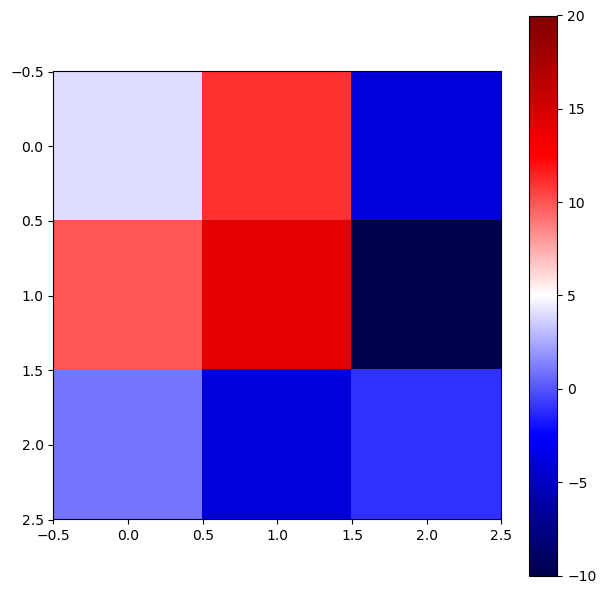

In [8]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_axes([.1,.1,.8,.8])

im = ax.imshow(X, cmap='seismic') # here we call the imshow function, with a colormap
fig.colorbar(im, ax=ax)
im.set_clim(vmin=-10, vmax=20) # setting the color limits

plt.show()

![alt](matrix_ovl.png "example of heatmap")

### 1.1.2 Matrix Functions

Within `scipy.linalg`, we can easily compute various matrix functions.

The function `scipy.linalg.inv(A)` computes the inverse of a matrix `A`.  (Remember that `numpy.linalg.inv(A)` does the same thing, but here we are showing that `scipy.linalg` can be used as an alternative.)

In [149]:
A = rnd.random((3,3)) # random 3x3 matrix
print('A = \n', A,'\n')

print('\nA^-1 = \n',linalg.inv(A)) # inverse of A

A = 
 [[0.93004572 0.6597584  0.2968534 ]
 [0.22513917 0.45952897 0.90857398]
 [0.13895513 0.0517816  0.20515171]] 


A^-1 = 
 [[ 0.58123962 -1.47666418  5.69878599]
 [ 0.98539432  1.84062892 -9.5776203 ]
 [-0.64241004  0.53560045  3.43194298]]


The function `scipy.linalg.det(A)` computes the determinant of a matrix `A`. 

In [14]:
print('det(A) = ',linalg.det(A)) # determinant of A

det(A) =  -0.08544806968167272


Another interesting function is `scipy.linalg.norm(A, ord=2)`, which computes the modulus of order `ord`. If `ord` $=$ `np.inf`, then the maximum value in $A$ is given. If `ord` $=$ `-np.inf`, then the minimum value in `A` is given. This function can be used for both vectors and matrices, and the default value for `ord` is 2.

In linear algebra, the norm of a vector is a measure of its length or magnitude. The most commonly used norm is the Euclidean norm (or L2 norm), which is calculated as the square root of the sum of the squares of the vector's components. In the case of matrices, the norm can be defined in various ways, such as the Frobenius norm or the operator norm. The Frobenius norm is calculated as the square root of the sum of the absolute squares of its elements. The operator norm is defined as the maximum singular value of the matrix.

Full documentation can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).


norm(A,ord=1) = $ \sqrt{4^2 + 3^2 + 1^2 + 2^2 + 2^2 + 1^2 + 1^2} $  

norm(A,ord=2) =  $ \sqrt[3]{4^3 + 3^3 + 1^3 + 2^3 + 2^3 + 1^3 + 1^3} $

In [ ]:
# examples of norms for vectors
A = np.array([4,3,1,2,2,1,1])

# order 1 will print the sum of absolute values
print('norm(A,ord=1) = 4 + 3 + 1 + 2 + 2 + 1 + 1 = ',linalg.norm(A, ord=1))

# order 2 will print the square root of the sum of squares
print('norm(A,ord=2) = (4**2 + 3**2 + 1**2 + 2**2 + 2**2 + 1**2 + 1**2)**(1/2) = ',linalg.norm(A)) # default is ord=2

# order 3 will print the cubic root of the sum of cubes
print('norm(A,ord=3) = (4**3 + 3**3 + 1**3 + 2**3 + 2**3 + 1**3 + 1**3)**(1/3) = ',linalg.norm(A, ord=3)) # ord=3

# order -inf will print the minimum absolute value of the elements
print('norm(A,ord=-np.inf) = ',linalg.norm(A, ord=-np.inf))

# order inf will print the maximum absolute value
print('norm(A,ord=np.inf) = ',linalg.norm(A, ord=np.inf))

norm(A,ord=1) = 4 + 3 + 1 + 2 + 2 + 1 + 1 =  14.0
norm(A,ord=2) = (4**2 + 3**2 + 1**2 + 2**2 + 2**2 + 1**2 + 1**2)**(1/2) =  6.0
norm(A,ord=3) = (4**3 + 3**3 + 1**3 + 2**3 + 2**3 + 1**3 + 1**3)**(1/3) =  4.791419857062784
norm(A,ord=-np.inf) =  1.0
norm(A,ord=np.inf) =  4.0


In [ ]:
# examples of norms for matrices
A = np.array([[4,3,1],[2,2,1],[1,0,0]])

# order 1 will print the maximum column sum
print('norm(A,ord=1) = max(4+2+1, 3+2+0, 1+1+0) = ',linalg.norm(A, ord=1))

# order 2 will print the largest singular value
print('norm(A,ord=2) = largest singular value = ',linalg.norm(A, ord=2))

# order inf will print the maximum row sum
print('norm(A,ord=np.inf) = max(4+3+1, 2+2+1, 1+0+0) = ',linalg.norm(A, ord=np.inf))


norm(A,ord=1) = max(4+2+1, 3+2+0, 1+1+0) =  7.0
norm(A,ord=2) = largest singular value =  5.9431746852383665
norm(A,ord=np.inf) = max(4+3+1, 2+2+1, 1+0+0) =  8.0


Singular values of a matrix measure how much the matrix stretches or compresses space along certain directions. They are obtained from the singular value decomposition (SVD) of the matrix.

Singular values are important as they provide insights into the properties of the matrix, such as its rank and condition number. In practical terms, singular values help us understand how a matrix transforms data and can be used to identify important features or patterns within the data. While the norm provides a measure of the overall size or length of a vector or matrix, singular values give a more detailed picture of how the matrix behaves in different directions.

Possible values for `ord` are:

| ord value | Description                                      |
|-----------|--------------------------------------------------|
| None      | Frobenius norm (default for matrices)            |
| 'fro'     | Frobenius norm                                   |
| np.inf    | Maximum absolute row sum (for matrices)         |
| -np.inf   | Minimum absolute row sum (for matrices)         |
| 1         | Maximum absolute column sum (for matrices)      |
| -1        | Minimum absolute column sum (for matrices)      |
| 2         | Largest singular value (for matrices)           |
| -2        | Smallest singular value (for matrices)          |

The function `scipy.linalg.expm(A)` computes the matrix exponential of `A`, while `scipy.linalg.logm(A)` computes the matrix logarithm.


In [151]:
A = np.array([[1,2],[3,4]])

print('A = \n', A,'\n')
print('expm(A) = \n', linalg.expm(A),'\n') # matrix exponential
print('logm(A) = \n', linalg.logm(A),'\n') # matrix logarithm
print('sqrtm(A) = \n', linalg.sqrtm(A),'\n') # matrix square root


A = 
 [[1 2]
 [3 4]] 

expm(A) = 
 [[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]] 

logm(A) = 
 [[-0.35043981+2.39111795j  0.92935121-1.09376217j]
 [ 1.39402681-1.64064326j  1.04358699+0.7504747j ]] 

sqrtm(A) = 
 [[0.55368857+0.46439416j 0.80696073-0.21242648j]
 [1.21044109-0.31863972j 1.76412966+0.14575444j]] 



### 1.1.3 Spectral Decomposition

We can represent a matrix in terms of it's eigenvectors and eigenvalues, or in other words, perform a spectral decomposition; `scipy.linalg.eig(A)` can be used to achive this by computing the eigenvalues and eigenvectors of `A`, giving a tuple.  Then you can slice the tuple to get the eigenvalues and eigenvectors separately. 

Full documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html).

In [ ]:
A = rnd.random((3,3))

eigval, eigvec = linalg.eig(A) 

print('Eigenvalues = \n',eigval, '\n')
print('Eigenvector Matrix = \n',eigvec, '\n')

print('First Eigenvector = \n',eigvec[:,0], '\n')

Eigenvalues = 
 [ 1.16410722+0.j -0.15120683+0.j  0.32421728+0.j] 

Eigenvector Matrix = 
 [[ 0.81151132  0.26760996  0.83866799]
 [ 0.15186678  0.16186288 -0.46465972]
 [ 0.56425691 -0.94983436  0.28412559]] 

First Eigenvector = 
 [0.81151132 0.15186678 0.56425691] 



### 1.1.4 Special Matrices

Scipy supports the creation of special matrices that are commonly used. 

Special matrices can be used in different problems in linear algebra, numerical analysis, and scientific computing. For instance, they can be used as test cases for algorithms, in simulations, or in the study of matrix properties. For example, we can create a Hadamard matrix (which is a square matrix whose entries are either +1 or -1) of order `n` using `scipy.linalg.hadamard(n)`. The integer `n` must be a power of $2$. These matrices have applications in error correction, signal processing, and combinatorial design.


In [25]:
H = linalg.hadamard(n=2)

print(H)

[[ 1  1]
 [ 1 -1]]


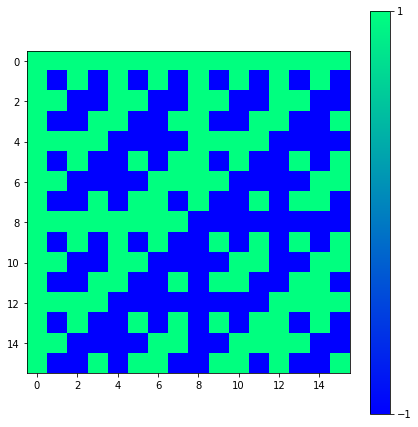

In [34]:
H = linalg.hadamard(n=2**4)

fig = plt.figure(figsize = (7,7))
ax = fig.add_axes([.1,.1,.8,.8])

im = ax.imshow(H, cmap='winter')
fig.colorbar(im, ticks=[-1,1])

plt.show()

A table with some of the special matrices that can be created using `scipy.linalg` are:

| Function                                   | Description                                                                                       |
|--------------------------------------------|---------------------------------------------------------------------------------------------------|
| `scipy.linalg.hadamard(n)`                 | Creates a Hadamard matrix of order `n`. The Hadamard matrix is a square matrix whose entries are either +1 or -1, and whose rows are mutually orthogonal. |
| `scipy.linalg.toeplitz(c, r)`              | Creates a Toeplitz matrix given the first column `c` and the first row `r`. A Toeplitz matrix is a matrix in which each descending diagonal from left to right is constant. |
| `scipy.linalg.hankel(c, r)`                | Creates a Hankel matrix given the first column `c` and the last row `r`. A Hankel matrix is a matrix in which each ascending skew-diagonal from left to right is constant. |
| `scipy.linalg.circulant(c)`                | Creates a circulant matrix given the first column `c`. A circulant matrix is a special type of Toeplitz matrix where each row is a cyclic shift of the previous row. |

The full list of special matrices can be found in the [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html). See Special Matrices section.

In [ ]:
# examples of special matrices

# Hadamard matrix, n must be a power of 2
H = linalg.hadamard(n=4) 
print('Hadamard Matrix H = \n', H, '\n')

# Toeplitz matrix, constant along diagonals
T = linalg.toeplitz(c=[1,2,3], r=[1,4,5]) 
print('Toeplitz Matrix T = \n', T, '\n')

# Hankel matrix, constant along skew-diagonals
K = linalg.hankel(c=[1,2,3], r=[3,4,5])
print('Hankel Matrix K = \n', K, '\n')

# Circulant matrix, each row is a cyclic shift of the previous row
C = linalg.circulant(c=[1,2,3])
print('Circulant Matrix C = \n', C, '\n')


Hadamard Matrix H = 
 [[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]] 

Toeplitz Matrix T = 
 [[1 4 5]
 [2 1 4]
 [3 2 1]] 

Hankel Matrix K = 
 [[1 2 3]
 [2 3 4]
 [3 4 5]] 

Circulant Matrix C = 
 [[1 3 2]
 [2 1 3]
 [3 2 1]] 



TypeError: convolution_matrix() got an unexpected keyword argument 'h'

### 1.1.5 Sparse Matrix

A sparse matrix is a memory efficient way to store large matrices that contain a lot of zeros. The most common sparse matrix format is the Compressed Sparse Row (CSR) format, which stores only the non-zero elements of the matrix along with their row and column indices. Then all the rest of the elements are assumed to be zero. This format is particularly useful for large matrices that are mostly empty, as it saves memory and allows for efficient matrix operations.

Scipy provides a module `scipy.sparse` that contains functions and classes for working with sparse matrices.

This is indeed, one of the main advantages of using Scipy over NumPy.

In [174]:
A = np.array([[0,0,1],[2,0,0],[0,3,0]]) # numpy array

print("Before conversion:\n",type(A),'\n') # checking the type of A
print(A,'\n')

A = scipy.sparse.csc_array(A) # converting to sparse matrix

print("After conversion:\n",type(A),'\n') # checking the type of A
print(A, '\n') # printing the sparse matrix



Before conversion:
 <class 'numpy.ndarray'> 

[[0 0 1]
 [2 0 0]
 [0 3 0]] 

After conversion:
 <class 'scipy.sparse._csc.csc_array'> 

  (np.int32(1), np.int32(0))	2
  (np.int32(2), np.int32(1))	3
  (np.int32(0), np.int32(2))	1 



Notice that each tuple corresponds to the element location. We can conceivably represent any matrix in this form, but clearly this would be less efficient for non-sparse matrices. We can perform the standard matrix operations with sparse matrices as shown below. To convert back to a dense matrix, we use the `A.todense()`.

In [29]:
print(A.todense(),'\n')

print((A+A).todense(),'\n')

print((A*A).todense(),'\n')

print((A.dot(A)).todense(),'\n')

print(A, '\n')

vec = np.array([[1],[2],[3]])

print((A*vec))

[[0 0 1]
 [2 0 0]
 [0 3 0]] 

[[0 0 2]
 [4 0 0]
 [0 6 0]] 

[[0 3 0]
 [0 0 2]
 [6 0 0]] 

[[0 3 0]
 [0 0 2]
 [6 0 0]] 

  (np.int32(0), np.int32(2))	1
  (np.int32(1), np.int32(0))	2
  (np.int32(2), np.int32(1))	3 

[[3]
 [2]
 [6]]


It is also useful to initialise an empty sparse matrix and then populate it with non-zero elements with `scipy.sparse.lil_matrix((n,m))`. This saves us from creating a very large matrix with many zeros in the first place.

In [34]:
A = scipy.sparse.lil_matrix((3,3)) #Empty 3x3 sparse matrix

A[0,0] = 1 # Assigning values to some elements
A[0,1] = 2
A[2,0] = 7
A[2,2] = 1

print(type(A),'\n')
print('A (sparse matrix)= \n',A,'\n')
print('A (dense matrix)= \n',A.todense())

<class 'scipy.sparse._lil.lil_matrix'> 

A (sparse matrix)= 
   (0, 0)	1.0
  (0, 1)	2.0
  (2, 0)	7.0
  (2, 2)	1.0 

A (dense matrix)= 
 [[1. 2. 0.]
 [0. 0. 0.]
 [7. 0. 1.]]


As well as in Numpy, `scipy.sparse` provides functionalities on sparse matrices, including various matrix operations and manipulations that take advantage of the sparsity of the data.

Functions building sparse arrays such as `diag()` (extract a diagonal or construct a diagonal array), `eye()` (create a 2-D array with ones on the diagonal and zeros elsewhere), `identity()` (create an identity matrix), `kron()` (Kronecker product), `random()` (generate a sparse random matrix), and `tril()` (extract the lower triangular part of a matrix) are available in `scipy.sparse`.

See full documentation at: https://docs.scipy.org/doc/scipy/reference/sparse.html


**Short exercise using sparse matrices:**

Create a sparse matrix representing a 5x5 identity matrix using `scipy.sparse`. Then, convert it to a dense matrix and print both the sparse and dense representations. Then, verify that the dense matrix is indeed an identity matrix by checking its diagonal elements. Calculate and print the sum of the diagonal elements to confirm it equals 5. 

```{admonition} Solution here!
:class: dropdown
```python
from scipy.sparse import csr_matrix, eye
import numpy as np

# Create a sparse matrix representing a 5x5 identity matrix
sparse_matrix = eye(5, format='csr')

# Convert the sparse matrix to a dense matrix
dense_matrix = sparse_matrix.toarray()

# Print both representations
print("Sparse matrix representation:")
print(sparse_matrix)
print("\nDense matrix representation:")
print(dense_matrix)

# Verify that the dense matrix is indeed an identity matrix
is_identity = np.all(np.diag(dense_matrix) == 1) and np.all(dense_matrix == dense_matrix.T)
print("\nIs the dense matrix an identity matrix?", is_identity)

# Calculate and print the sum of the diagonal elements
diagonal_sum = np.sum(np.diag(dense_matrix))
print("Sum of the diagonal elements:", diagonal_sum)
```

### 1.1.6 Matrix Exponential

The matrix exponential of a matrix $A$ is written as

$$ \exp (A) = e^{A} = \sum_{k=0}^{\infty} \frac{1}{k!}A^k . $$

This seems like a complex task but it can easily be achieved with `scipy.linalg.expm(A)`. The matrix exponential is useful in solving systems of linear differential equations.

In [3]:
n=4
A = (1/np.sqrt(n))*linalg.hadamard(n)
print(A,'\n')

expA = linalg.expm(A)

print(expA,'\n')

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]] 

[[ 2.13068123  0.5876006   0.5876006   0.5876006 ]
 [ 0.5876006   0.95548004  0.5876006  -0.5876006 ]
 [ 0.5876006   0.5876006   0.95548004 -0.5876006 ]
 [ 0.5876006  -0.5876006  -0.5876006   2.13068123]] 



Also we can verify that 

$$ \exp \left(A^T\right) = \exp \left(A\right)^T $$

and

$$ \exp \left(A^\dagger \right) = \exp \left(A \right)^\dagger $$

In [5]:
A = rnd.random((n,n)) + 1j*rnd.random((n,n))

Q = np.round(linalg.expm(A).T,3) == np.round(linalg.expm(A.T),3)
print(Q,'\n')

Q = np.round((np.matrix(linalg.expm(A))).H,3) == np.round(linalg.expm(np.matrix(A).H),3)
print(Q,'\n')

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 



One key point with matrices is that if $A$ and $B$ do not commute,

$$AB \neq BA \iff [A,B]= AB -BA \neq0.$$
then

$$ e^A e^B \neq e^{A+B}.$$

But if 

$$[A,B]= AB -BA =0$$

then

$$e^Ae^B = e^{A+B}. $$

In [62]:
A = np.array([[0,1],[0,0]])
B = np.eye(2)
# These matrices commute

EA = linalg.expm(A)@linalg.expm(B) == linalg.expm(A+B)
print(EA,'\n')

A = np.array([[0,1],[0,0]])
B = np.array([[0,1],[1,0]])
# These matrices do not commute

EA = linalg.expm(A)@linalg.expm(B) == linalg.expm(A+B)
print(EA,'\n')

[[ True  True]
 [ True  True]] 

[[False False]
 [False False]] 



### 1.1.7 Unitary Matrix

A Unitary Matrix is defined as a matrix that satisfies the condition,

$$AA^{\dagger} =  A^{\dagger}A = \mathbb{1}$$

where $A^{\dagger}$ is the Hermitian conjugate (or adjoint) of the matrix $A$, and
where $\mathbb{1}$ is the identity matrix. In other words the Hermitian conjugate of the matrix is it's multiplicative inverse,

$$A^{-1} = A^\dagger$$

A unitary matrix preserves the inner product, meaning that for any vectors $x$ and $y$,

$$\langle Ax, Ay \rangle = \langle x, y \rangle$$

This property makes unitary matrices particularly important in quantum mechanics, where they represent quantum gates that preserve the normalization of quantum states.

The Hadamard gate is unitary as we see below.

In [19]:
# Unitary matrix example
n=4 
A = (1/np.sqrt(n))*linalg.hadamard(n)

# print the matrix
print(A,'\n')

# convert to matrix
A = np.matrix(A)

# check unitarity
print(A*A.H==A.H*A,'\n')

# print the result
print(A*A.H,'\n')

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]] 

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 



We can also generate a random unitary matrix, of dimension `n`, using `scipy.stats.unitary_group.rvs(n)`.

In [21]:
# Generating a random unitary matrix
n=4
U = stats.unitary_group.rvs(n)

# Check if U is unitary
print(np.round(np.dot(U,U.conj().T)),'\n')

# convert to matrix
U = np.matrix(U)

# print the result
print(np.round(U,3),'\n')

# check unitarity
print(np.round(U.H*U))

[[1.+0.j 0.-0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.-0.j 0.+0.j]
 [0.-0.j 0.+0.j 1.+0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.+0.j 1.+0.j]] 

[[-0.22 +0.209j  0.077+0.285j  0.58 -0.46j   0.369-0.37j ]
 [-0.858-0.095j  0.1  +0.004j -0.027-0.159j -0.409+0.228j]
 [-0.167+0.112j  0.657-0.332j  0.078+0.501j  0.061-0.397j]
 [-0.319+0.145j -0.601-0.011j -0.345+0.223j  0.101-0.58j ]] 

[[ 1.+0.j -0.-0.j -0.+0.j -0.+0.j]
 [-0.+0.j  1.+0.j  0.-0.j  0.-0.j]
 [-0.-0.j  0.+0.j  1.+0.j  0.+0.j]
 [-0.-0.j  0.+0.j  0.-0.j  1.+0.j]]


### 1.1.8 Tensor Product

In the function `scipy.sparse.kron(A,B)` the matrices/vectors `A` and `B` can be sparse or dense. Remember that the Kronecker product (or tensor product) of two matrices is a larger matrix formed by multiplying each element of the first matrix by the entire second matrix. 

The mathematical expression for the tensor product of two $2\times2$ matrices $A$ and $B$ is as follows

$$ A = 
\begin{pmatrix}
a_{11} & a_{12} \\ 
a_{21} & a_{22}
\end{pmatrix}, 
\ \ \ \ 
B = 
\begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix},$$

$$ A \otimes B = 
\begin{pmatrix}
a_{11} B & a_{12} B \\ 
a_{21} B & a_{22} B
\end{pmatrix} = 
\begin{pmatrix}
a_{11} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix} & a_{12} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix} \\ 
a_{21} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix} & a_{22} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
a_{11} b_{11} & a_{11} b_{12} & a_{12} b_{11} & a_{12} b_{12} \\ 
a_{11} b_{21} & a_{11} b_{22} & a_{12} b_{21} & a_{12} b_{22} \\ 
a_{21} b_{11} & a_{21} b_{12} & a_{22} b_{11} & a_{22} b_{12} \\ 
a_{21} b_{21} & a_{21} b_{22} & a_{22} b_{21} & a_{22} b_{22}
\end{pmatrix}.
$$

Effectively, each element of matrix $A$ is multiplied by the entire matrix $B$ to form the larger matrix $A \otimes B$. It is computed as a sparse matrix for efficiency. 

The structure is similar for differently shaped matrices and vectors.


In [16]:
# Kronecker product examples
A = np.array([[1, -2], [-1, 2]])
B = np.array([[1, 2], [3, 4]])

result_dense = scipy.sparse.kron(A,B)

# print in sparse format
#print('Result dense = \n',result_dense )
# print in dense format
print('Result dense = \n',result_dense.todense(),'\n')

# convert to sparse matrices
A = scipy.sparse.csr_matrix(A)
B = scipy.sparse.csr_matrix(B)

result_sparse = scipy.sparse.kron(A,B)

print('Result sparse = \n',result_sparse.todense())


Result dense = 
 [[ 1  2 -2 -4]
 [ 3  4 -6 -8]
 [-1 -2  2  4]
 [-3 -4  6  8]] 

Result sparse = 
 [[ 1  2 -2 -4]
 [ 3  4 -6 -8]
 [-1 -2  2  4]
 [-3 -4  6  8]]


You can see that independently of whether the input matrices are dense or sparse, the output is always the same.

```{note}
Difference between Kronecker product and Tensor product:
The Kronecker product is a particular universal bilinear map on a pair of vector spaces, each of which consists of matrices of a specified size. The tensor product is a universal bilinear map on a pair of vector spaces (of any sort). Read more at: https://math.stackexchange.com/questions/203947/tensor-product-and-kronecker-product
```

### 1.1.9 Least Square Fit

The package `scipy.linalg` also supports least-square fitting, a method that fits data points to a curve. The relevant function is `scipy.linalg.lstsq(A, c)`. To demonstrate how this works, we are going to use this function to approximate the values of $c_1$ and $c_2$ in the following function

$$ y = c_1 x^2 + c_2 x$$

We will generate data points by adding noise to this function for certain values of $c_1$ and $c_2$. We will then then try to fit the noisy data with `scipy.linalg.lstsq(A, c)`, comparing our approximate values of $c_i$ to the actual values.

Lets set $c_1 = 0.5$ and $c_2 = 2.0$.  

$A$ is a matrix of the set of functions, of $x$, describing $y$. So in this case

$$ A = [x^2,x] $$

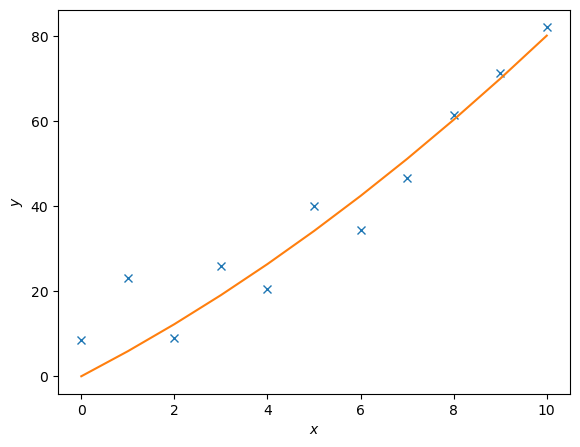

In [ ]:
# First we generate some noisy data
c1, c2 = 0.5, 2.0

# Generating x values
x = np.arange(11)

# Generating y values without noise
y = c1*x**2 + c2*x

# Adding some noise
noise = y + 0.3 * np.max(y) * rnd.random(len(y))

# The `np.c_` function stacks 1D arrays as columns into a 2D array
A = np.c_[x**2,x]

# Then we use lstsq to fit the noisy data
c, resid, rank, sigma = linalg.lstsq(A, noise)

# Fitted values
y2 = c[0]*x**2 + c[1]*x

# Plotting the results
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,noise,'x',x,y2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

**Exercise on Least Square Fit:**
Create a set of noisy data points based on the function $y = 0.5x^2 + 2.0x$ for $x$ values ranging from -10 to 10. Use `scipy.linalg.lstsq()` to fit the noisy data and estimate the coefficients $c_1$ and $c_2$. Finally, plot the original function, the noisy data points, and the fitted curve on the same graph for comparison.

```{admonition} Solution here!
:class: dropdown
```python
from scipy.linalg import lstsq
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 100)

# True coefficients
c1_true = 0.5
c2_true = 2.0

# Generate noisy data points
y_true = c1_true * x**2 + c2_true * x
noise = np.random.normal(0, 10, size=x.shape)
y_noisy = y_true + noise

# Construct matrix A for the least squares fit
A = np.vstack([x**2, x]).T

# Perform least squares fitting
c_estimated, residuals, rank, s = lstsq(A, y_noisy)
c1_estimated, c2_estimated = c_estimated
print(f"Estimated coefficients: c1 = {c1_estimated}, c2 = {c2_estimated}")

# Plot the original function, noisy data points, and fitted curve
plt.scatter(x, y_noisy, label='Noisy Data', color='red', s=10)
plt.plot(x, y_true, label='True Function', color='blue')
y_fitted = c1_estimated * x**2 + c2_estimated * x
plt.plot(x, y_fitted, label='Fitted Curve', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Fit')
plt.show()
```

### 1.1.10 Singular Value Decomposition

Singular value decomposition is an extension of the eigenvalue, eigenvector problem to non-square matrices. The following matrices, and vector, are generated using `scipy.linalg.svd()`

$$ A = USv, $$

where $A$ is a non-square matrix, $U$ is a square matrix, $S$ is a diagonal matrix, and $v$ is a vector. 

In [ ]:
A = rnd.random((3,2)) # example of a non-square matrix
print('A = \n',A,'\n')

U, D, v = linalg.svd(A)

print('U = \n',U,'\n')
print('Diagonal Elements = \n',D,'\n')
print('v = \n',v,'\n')

S = scipy.sparse.lil_matrix((3,2))
S[0,0] = D[0]
S[1,1] = D[1]

S = S.todense()
print('S = \n', S, '\n')

print('A = \n',U*S*v)

A = 
 [[0.85007646 0.4827918 ]
 [0.93908931 0.38612396]
 [0.78479183 0.86115779]] 

U = 
 [[-0.54258897 -0.24498603 -0.80347935]
 [-0.55278372 -0.61607757  0.56114043]
 [-0.63247717  0.74861891  0.19885261]] 

Diagonal Elements = 
 [1.79477739 0.35066145] 

v = 
 [[-0.82278634 -0.56835081]
 [-0.56835081  0.82278634]] 

S = 
 [[1.79477739 0.        ]
 [0.         0.35066145]
 [0.         0.        ]] 

A = 
 [[0.85007646 0.4827918 ]
 [0.93908931 0.38612396]
 [0.78479183 0.86115779]]


### 1.1.11 Schur Decomposition

The Schur Decomposition of $n\times n$ matrices gives said matices in the form

$$ A = Z T Z^\dagger $$

Where $Z$ is a unitary matrix, and $T$ is an upper-triangular(or quasi-upper) matrix. 

For any given matrix, the Schur decomposition (or factorization) allows to find another matrix that is similar to the given one and is upper triangular. Moreover, the change-of-basis matrix used in the similarity transformation is unitary. In other words, the Schur decomposition shows that each matrix is unitarily similar to an upper triangular matrix. (Source:https://www.statlect.com/matrix-algebra/Schur-decomposition)

The Schur decomposition is useful in numerical analysis and linear algebra for several reasons:
1. **Eigenvalue Computation**: The Schur decomposition provides a numerically stable way to compute the eigenvalues of a matrix. The eigenvalues of the original matrix are found on the diagonal of the upper-triangular matrix $T$.
2. **Matrix Functions**: It allows for efficient computation of matrix functions, such as the matrix exponential or logarithm, by applying the function to the upper-triangular matrix $T$.
3. **Stability Analysis**: The Schur decomposition is used in stability analysis of dynamical systems, as it provides insights into the stability properties of the system.
4. **Numerical Algorithms**: Many numerical algorithms for solving linear algebra problems, such as the QR algorithm for eigenvalue computation, are based on the Schur decomposition.
5. **Control Theory**: In control theory, the Schur decomposition is used to analyze and design control systems, particularly in the context of state-space representations.
6. **Signal Processing**: The Schur decomposition is also applied in signal processing, particularly in the design of digital filters and in the analysis of linear systems.
7. **Machine Learning**: The Schur decomposition can be used in machine learning, particularly in the context of dimensionality reduction and feature extraction.
8. **Quantum Computing**: In quantum computing, the Schur decomposition is used in the analysis of quantum gates and circuits, particularly in the context of quantum state transformations.

We can request these matrices in a real or complex form using `scipy.linalg.schur(A)` and `scipy.linalg.schur(A,'complex')` or by using `scipy.linalg.rsf2csf(A)` for the complex form (where `A` is the original matrix).

In [185]:
# First we generate a random 3x3 matrix
A = rnd.random((3,3))
print('A = \n', A, '\n')

# Now we compute its Schur decomposition
T, Z = linalg.schur(A)  # where T is the real Schur form and Z the real Schur vectors
Tc, Zc = linalg.schur(A, 'complex') # where Tc is the complex Schur form and Zc the complex Schur vectors

# Converting to numpy matrices for easier handling of Hermitian conjugates
# map applies the np.matrix function to each element in the tuple
T, Z, Tc, Zc = map(np.matrix,(T,Z, Tc, Zc))

# Finally we print the results
print('T = \n',T) 
print('Z = \n',Z) 
print('Tc = \n',Tc) 
print('Zc = \n',Zc) 


A = 
 [[0.8364588  0.0141936  0.19691753]
 [0.81386296 0.02552034 0.02713407]
 [0.42127484 0.58366012 0.31276195]] 

T = 
 [[ 1.07724082  0.49727195  0.42761794]
 [ 0.          0.04875013 -0.1143075 ]
 [ 0.          0.64027321  0.04875013]]
Z = 
 [[-0.57705908 -0.72358244 -0.37872321]
 [-0.46389283  0.67205561 -0.57718689]
 [-0.67216535  0.15738395  0.7234805 ]]
Tc = 
 [[ 1.07724082+1.66533454e-16j -0.37572976+2.26811033e-01j
  -0.07585703+4.81420923e-01j]
 [ 0.        +0.00000000e+00j  0.04875013+2.70532860e-01j
   0.38007151-3.63573344e-01j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.04875013-2.70532860e-01j]]
Zc = 
 [[ 0.43873923+0.37484005j -0.41529783-0.16895102j -0.45646534+0.5075682j ]
 [ 0.35269869+0.30133069j -0.43355255+0.40389351j  0.10926541-0.64943571j]
 [ 0.51104873+0.4366182j   0.6557513 -0.13370011j  0.31646979+0.01245487j]]


In [187]:
# We can reconstruct the original matrix
print('A = \n',Z*T*Z.H, '\n')

# Also the original matrix in complex form
print('A = \n',Zc*Tc*Zc.H)

A = 
 [[0.8364588  0.0141936  0.19691753]
 [0.81386296 0.02552034 0.02713407]
 [0.42127484 0.58366012 0.31276195]] 

A = 
 [[0.8364588 +1.87350135e-16j 0.0141936 -5.55111512e-17j
  0.19691753+2.77555756e-17j]
 [0.81386296+8.67361738e-17j 0.02552034-3.05311332e-16j
  0.02713407+5.55111512e-17j]
 [0.42127484+1.11022302e-16j 0.58366012+9.71445147e-17j
  0.31276195+0.00000000e+00j]]


## 1.2 Scipy Optimization
Scipy's `optimize` module provides a variety of optimization algorithms for finding the minimum or maximum of functions, solving equations, and performing curve fitting.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy
from scipy import optimize

### 1.2.1 Function Minimum
We can use `scipy.optimize.minimize()` to find the minimum of a scalar function of one or more variables. 

The function takes as input the function to be minimized, an initial guess for the variables, and optional arguments such as method and bounds. Bounds can be specified using the `scipy.optimize.Bounds` class, which takes as input two arrays representing the lower and upper bounds for each variable.

First we define a function to be minimized:

In [188]:
def f(b):
    """
    Function to be minimized. 
    In this text block you can describe the function and its parameters. Example:
    
    b: array-like, shape (3,)
        Input variables for the function.
    Returns
    -------
    float
        The computed value of the function at the given input.
    """
    return -(.6*np.log(1+b[0]-b[1]-b[2])+.3*np.log(1-b[0]+2*b[1]-b[2])+.1*np.log(1-b[0]-b[1]+4*b[2]))

**Extra** : See the text block inside the function definition. This annotation reports the objective of the function, its parameters, and its return value. This so called docstring (which means documentation string) can be accessed using `f.__doc__`. It will print out the docstring of the function.


In [189]:
print(f.__doc__)


    Function to be minimized. 
    In this text block you can describe the function and its parameters. Example:
    
    b: array-like, shape (3,)
        Input variables for the function.
    Returns
    -------
    float
        The computed value of the function at the given input.
    


Then, we can use `minimize` to find the minimum of this function starting from an initial guess. The result object contains information about the optimization process, including the optimal values of the variables and the function value at the minimum.

In [190]:
from scipy.optimize import Bounds # we import the Bounds class

bounds = Bounds([0.0, 0.0, 0.0], [1.0, 1.0, 1.0]) # bounds for b0, b1, b2
# IMPORTANT: note that the bounds are inclusive

# then we define an initial guess and call the minimize function
initial_guess = np.array([0.0,0.0,0.0])
result = optimize.minimize(f, initial_guess, bounds=bounds)

# print info about the optimization including the optimal values of b0, b1, b2
print(result) 

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.026702217002269872
        x: [ 3.000e-01  1.000e-01  0.000e+00]
      nit: 6
      jac: [ 5.211e-07 -1.138e-07  1.667e-01]
     nfev: 28
     njev: 7
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


Given some function we are able to find a local minimum using `scipy.optimize.fmin(f,x0)`, where `f` is the function in question, `x0` is an initial guess.

In [23]:
def f(x):
    """
    Function to be minimized.

    Returns
    -------
    float
        The computed value of the function at the given input.
    """
    return x**4 + x**3 + x**2 - 7*x + 10

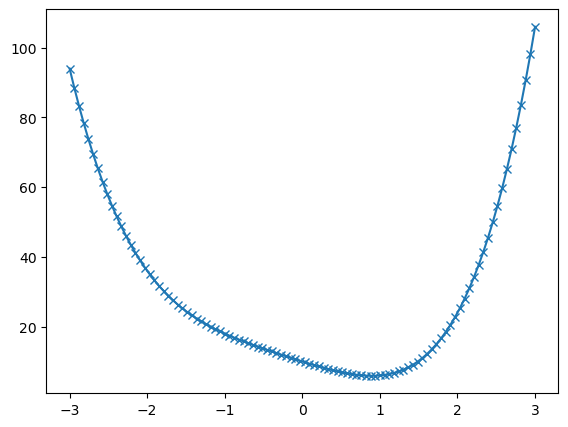

In [24]:
# Generate x values
x = np.linspace(-3,3,100) # 100 points from -3 to 3

# Compute y values
y = f(x)

# Create a figure and axis
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,y, marker='x')

plt.show() # Remember the good practice of calling plt.show()

Here we can see that the function has a local minimum around $x \approx 1$.

We can use `scipy.optimize.fmin(f, x0)` to find the minimum. The function takes as input the function to be minimized and an initial guess for the variables.

In [25]:
# Find the minimum
x_min = optimize.fmin(f, 0) # initial guess is 0

print('\nThe minimum occurs at x =', x_min)


NameError: name 'optimize' is not defined

However if the function has multiple local minima the initial guess will determine which is found. In this case, we can try different initial guesses to find other minima.

In [195]:
def g(x):
    """
    Function to be minimized.
    
    Returns
    -------
    float
        The value of the function at x.
    """
    return x**4 - x**3 - 5* x**2 + x + 0

In [26]:
# Generate x values
x = np.linspace(-2,3,100)

# Compute y values calling  function g
y = g(x)

# Create a figure and axis
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,y, marker='x')

plt.show()

NameError: name 'g' is not defined

In [198]:
# Try different initial guesses to find different minima
# Running `optimize.fmin` will print information about the optimization process

x_min1 = optimize.fmin(g, -1) # initial guess is -1 
print('\nFirst minimum is at x_min1 =',x_min1,'\n')

x_min2 = optimize.fmin(g, 1) # initial guess is 1
print('\nSecond minimum is at x_min2 =',x_min2)

Optimization terminated successfully.
         Current function value: -4.697455
         Iterations: 14
         Function evaluations: 28

First minimum is at x_min1 = [-1.3078125] 

Optimization terminated successfully.
         Current function value: -10.019646
         Iterations: 16
         Function evaluations: 32

Second minimum is at x_min2 = [1.96025391]


### 1.2.2 Global Optimization

We can find the global minimum of a function, within given bounds, using `scipy.optimize.differential_evolution(func,bounds)`.  

Here `func` is the function to be minimized and `bounds` will be a list of lists containing the max and min of the input parameters of `func`. 

Compared with `scipy.optimize.minimize`, which finds a local minimum, `scipy.optimize.differential_evolution(func,bounds)` is a global optimization algorithm that can find the global minimum of a function within specified bounds.

It should be noted that this works best when `func` takes in one argument which is a list of the input parameters. Running this function returns the information about the optimization process with the min value found stored as `x`.

In [60]:
# Using differential evolution to find the global minimum
result = scipy.optimize.differential_evolution(g,[[-2,3]])

print(result)

             message: Optimization terminated successfully.
             success: True
                 fun: -10.019646349962706
                   x: [ 1.960e+00]
                 nit: 5
                nfev: 100
          population: [[ 1.976e+00]
                       [ 2.058e+00]
                       ...
                       [ 1.993e+00]
                       [ 1.984e+00]]
 population_energies: [-1.002e+01 -9.898e+00 ... -1.001e+01 -1.001e+01]
                 jac: [ 0.000e+00]


A similar process can be achieved with multivariable functions too.

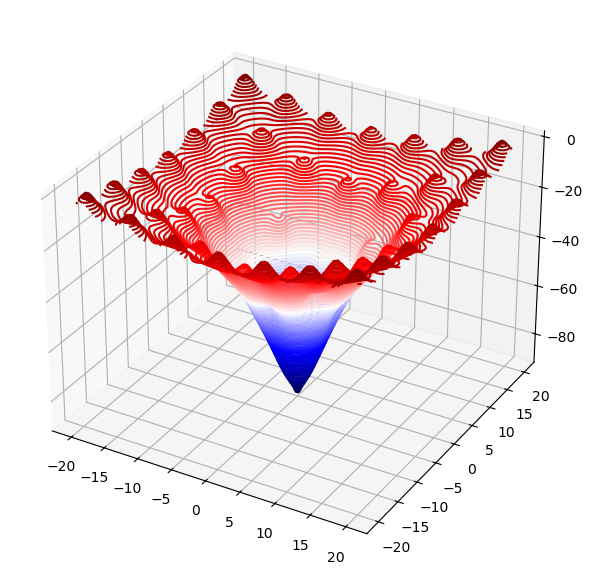

In [61]:
def f(params):
    """
    Function to be minimized.
    
    Returns
    -------
    float
        The computed value of the function at the given input.
    """
    return -100. * np.exp(-0.1*np.sqrt(params[0]**2 + params[1]**2)) + np.exp(np.cos(params[0]) + np.cos(params[1]))

# Define the bounds for x and y  
x_bound = [-20,20]
y_bound = [-20,20]

# Create a meshgrid for plotting
xs = np.linspace(x_bound[0], x_bound[1], 100)
ys = np.linspace(y_bound[0], y_bound[1], 100)

Xmesh,Ymesh = np.meshgrid(xs, ys)
Zmesh = f([Xmesh,Ymesh])

# Create a 3D contour plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([.1,.1,.8,.8],projection='3d')

ax.contour3D(Xmesh,Ymesh,Zmesh,90,cmap='seismic')

plt.show()

In this case we define a function of two variables, $x$ and $y$. The function takes a list of parameters and returns a scalar value. 

In the figure we can see a 3D contour plot of the function, with the global minimum clearly visible as the lowest point on the surface. However, it also has many local minima.

In [69]:
bounds = [x_bound,y_bound]
result = scipy.optimize.differential_evolution(f,bounds)

print(result) # This will print the full result object

print('\nMinimum value found: ',result.fun) # This will print the minimum value found
print('\nParameters at minimum: ',result.x) # Print the parameters at the minimum
print('\nBetter readability by rounding: ',np.round(result.x,2)) # We can round the result for better readability

             message: Optimization terminated successfully.
             success: True
                 fun: -92.61094381425436
                   x: [-8.534e-09 -1.591e-09]
                 nit: 12
                nfev: 483
          population: [[ 2.098e-02 -3.249e-02]
                       [ 4.648e-02  8.455e-02]
                       ...
                       [-5.636e-02 -1.915e-01]
                       [ 2.278e-02  2.100e-01]]
 population_energies: [-9.261e+01 -9.169e+01 ... -9.078e+01 -9.068e+01]
                 jac: [-6.518e+00  3.300e+00]

Minimum value found:  -92.61094381425436

Parameters at minimum:  [-8.53443517e-09 -1.59118297e-09]

Better readability by rounding:  [-0. -0.]


### 1.2.3 Function Roots
We can use `scipy.optimize.root()` to find the roots of a function (the points where the function evaluates to zero). This function takes as input the function whose roots we want to find, an initial guess for the variables, and optional arguments such as method and bounds.

First we define a function whose roots we want to find, then, we can use `root` to find the roots of this function starting from an initial guess. The result object contains information about the root-finding process, including the estimated roots and a success flag indicating whether the algorithm converged.

Example:

The function `scipy.optimize.fsolve(f,x0)` finds the roots of a function `f`, given an initial guess array `x0`.

In [215]:
def f(x):
    """
    Random quadratic function.
    
    Returns
    -------
    float
        The computed value of the function at the given input.
    """
    return 0.25*randy[0]*x**2 - randy[1]*2*x - randy[2]

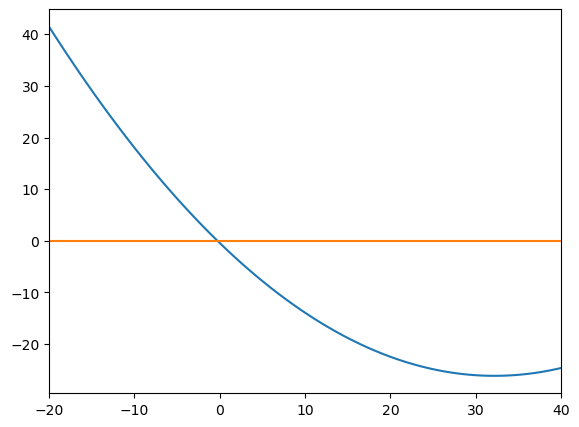

In [ ]:
# Generating random coefficients
randy = rnd.random(3)
# Generate x values
x = np.linspace(-20,40,100)

# Compute y values
y = f(x)

# Create a zero line for reference
y2 = np.zeros(len(x))

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])
ax.set_xlim(x[0],x[-1])

ax.plot(x,y,x,y2, marker='x')

plt.show()

In [ ]:
# We use fsolve to find the roots of the function
roots = optimize.fsolve(f,[x[0],x[-1]]) # initial guesses are the two ends of the x range

# Print the roots found
print('Roots:', roots)

Roots: [-0.27049045 64.6411364 ]


How would you print the value for just the first root found?
```{admonition} Hint
:class: dropdown
Since they are printed between square brakets, they are stored in an array. You can access the each element of an array using its index.
print('First root:', roots[0])

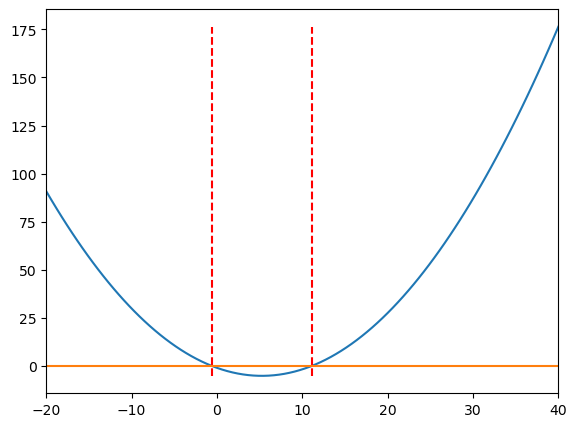

In [212]:
# Add vertical lines at the roots
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])
ax.set_xlim(x[0],x[-1])

ax.plot(x,y,x,y2)
ax.vlines(roots, ymin=min(y), ymax=max(y), colors='r', linestyles='dashed')

plt.show()

### 1.2.4 Optimize Least Square Fit
We can use `scipy.optimize.curve_fit()` to perform a least-squares fit of a function to data. 

This is extensively used in data analysis to find the best-fitting curve for a set of data points.

It function takes as input the function to be fitted, the independent variable data, the dependent variable data, and optional arguments such as initial parameter guesses and bounds.

Let's try to fit a set of noisy data points to a quadratic function.


[ 0.1603193   0.9900496  -0.85769889  0.88202893  0.48304872  0.63278928
 -0.0072206   0.01806238  0.97825922  0.35345489 -0.44502259 -0.57857787
  0.99701081 -0.8560111  -0.14911407  0.68674431  0.64972533 -0.16311452
 -0.30437536 -0.53892627]


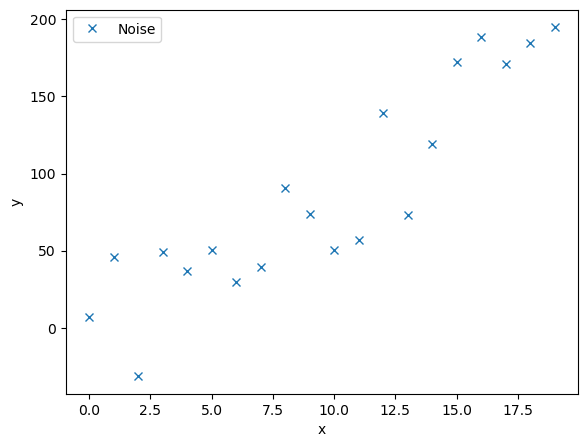

In [82]:
# First we create some noisy data points based on a quadratic function
c1, c2 = 0.5, 2.0 # coefficients of the quadratic function

# Generate x values
x = np.arange(20)

# Compute y values
y = c1*x**2 + c2*x

# Add noise to the data
random_sign = rnd.random(len(y))*((-1)**(2-(np.round(rnd.random(len(y)),0))))
print(random_sign)

noise = y + 0.2 * np.max(y) * random_sign # adding some noise

# Plot the noisy data points
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,noise,'x',label='Noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

We will now define a function to model this curve, as well as a function that calculates the residuals. 

The residuals are the differrence between each noisy data point and the model being fitted. 

This `scipy.optimize.leastsq(residuals,c_guess, args=(noise,x))` function gives back the coefficient `c` that minimises the residuals. We must input the noisy data, `noise`, and their corresponding `x` co-ordinates, as well as an intial guess for the coefficients `c_guess`.

[0.2956409  5.13268534]


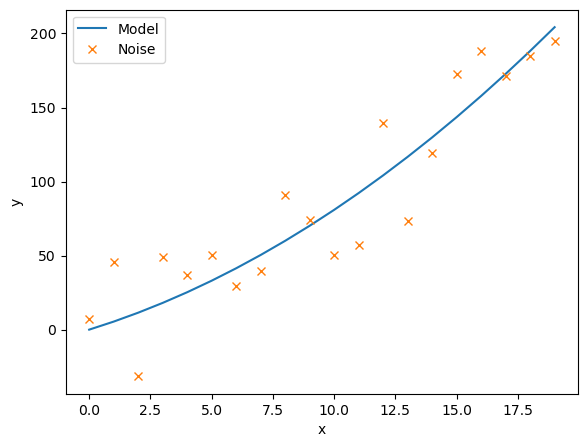

In [83]:
def model(x, c):
    """
    Quadratic model function.
    
    Parameters
    ----------
    x : array-like
        Independent variable data.
    c : array-like, shape (2,)
        Coefficients of the quadratic function.
    Returns
    -------
    array-like
        The computed values of the quadratic function at the given x values.
    """
    return c[0]*x**2 + c[1]*x

def residuals(c,y,x):
    """
    Residuals function for least squares fitting.

    Parameters
    ----------
    c : array-like, shape (2,)
        Coefficients of the quadratic function.
    y : array-like
        Noisy data points.
    x : array-like
        Independent variable data.
    Returns
    -------
    array-like
        The residuals (differences) between the noisy data points and the model.
    """
    return y - model(x,c)

# Initial guess for the coefficients
c_guess = np.array([0.0,2.1])

# Perform least squares fitting
c_result, flag = scipy.optimize.leastsq(residuals,c_guess, args=(noise,x))

# Print the fitted coefficients
print(c_result)

# Plot the fitted model against the noisy data
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x, model(x,c_result), label='Model')
ax.plot(x, noise, 'x', label='Noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

### 1.2.5 Curve Fit

The `scipy.optimize.curve_fit(model,xdata,ydata,p0)` function allows us to directly input the `model` function aswell the noisy data, (`xdata`,`ydata`), along with an initial guess for the model coefficients `p0`. We must define our model function with indiviual coefficeients rather than an array of cefficients.

[ 0.72831071 -0.65686659]


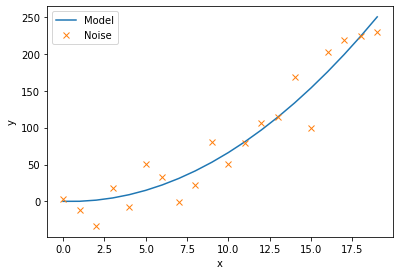

In [ ]:
def model(x, c1, c2):
    """
    Quadratic model function.
    Parameters
    ----------
    x : array-like
        Independent variable data.
    c1 : float
        Coefficient of x^2.
    c2 : float
        Coefficient of x.
    
    Returns
    -------
    array-like
        The computed values of the quadratic function at the given x values.
    """
    return c1*x**2 + c2*x

# Perform curve fitting
c_result, flag = scipy.optimize.curve_fit(model,x,noise,p0=(0.5,2.0))

# Print the fitted coefficients
print(c_result)

# Plot the fitted model against the noisy data
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,model(x,c_result[0],c_result[1]),label='Model')
ax.plot(x,noise,'x',label='Noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

## 1.3 Scipy Fourier Transform
Scipy's `fftpack` module provides functions for performing Fast Fourier Transforms (FFT) and related operations. FFT is an efficient algorithm for computing the Discrete Fourier Transform (DFT) and its inverse, which are widely used in signal processing, image analysis, and many others.

In [84]:
import matplotlib.pyplot as plt
import numpy as np

import scipy
import scipy.linalg as linalg
from scipy.fft import fft, fftfreq, fftshift # here we import the fft functions

### 1.3.1 The Fourier Transform

The Fourier transform changes a signal into the frequencies of the waves that it make up. To transform a signal $f(t)$, we use the formula:

$$ \hat{f}(\omega) = \int_{-\infty}^{+\infty}f(t)e^{-2\pi i \omega t}dt.$$

Scipy makes use of the discretised Fourier Transform:

$$\hat{f}_\omega = \sum_{n=0}^{N-1}f_n e^{-2\pi i \omega \frac{n}{N} }$$

where $f_n$ is the n-th element of an array of size $N$, and $\hat{f}_\omega$ is a new resulting array, of the same size, with each element dependent on the value of $\omega$.

For example:

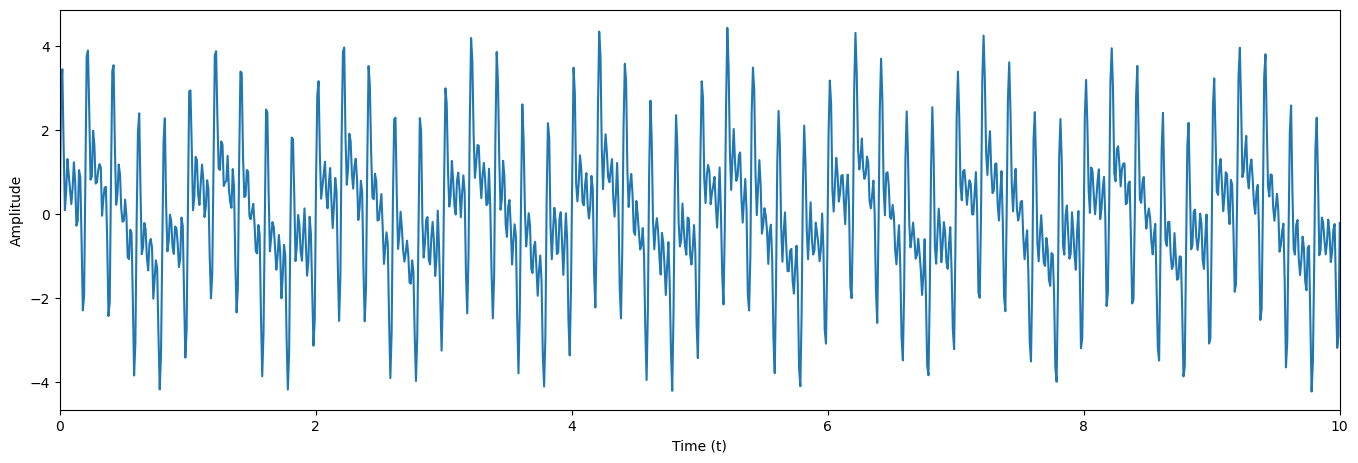

In [91]:
# Create a signal made up of several sine waves
steps = 1000
t = np.linspace(0,10,steps)
w = [1.0,5.0,10.0,15.0,20.0]

# Create a noisy signal
noise = 0.5*rnd.random(steps) - 0.25 # random noise between -0.25 and 0.25

# Combine the sine waves and noise
signal = 0  # initialize the signal
for wi in w:
    signal += np.sin(wi*t*2*np.pi)

signal += noise # add the noise to the signal

# Plot the noisy signal
fig = plt.figure(figsize=(16,5))
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(t,signal)
ax.set_xlabel('Time (t)')
ax.set_ylabel('Amplitude')
ax.set_xlim(t[0],t[-1])
plt.show()

The function `fft(signal)` returns the Fourier transform and `fftfreq(n,h)` gives the array of frequencies that correspond to a number of times equal to `n` with gaps of `h` between them.


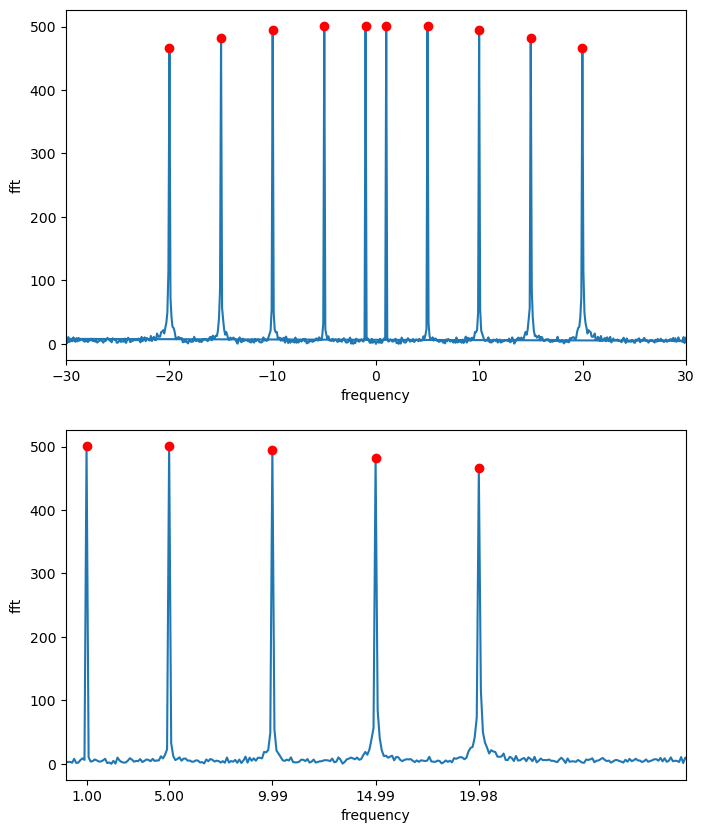

Fourier Transform Peak Frequencies = [ 0.999  4.995  9.99  14.985 19.98 ]


In [92]:
n = len(t) # number of sample points
h = t[1]-t[0] # sample spacing

# Compute the Fourier Transform
Fourier = fft(signal)  # fft of the signal
freq = fftfreq(n, h)   # corresponding frequencies

# Plot the Fourier Transform
fig, ax = plt.subplots(2,1,figsize=(8,10))

ax[0].plot(freq,abs(Fourier),freq[abs(Fourier) > 300],abs(Fourier)[abs(Fourier) > 300],'ro')
ax[0].set_xlabel('frequency')
ax[0].set_ylabel('fft')
ax[0].set_xlim(-30,30)

# We select only the positive frequencies for better visualization
positive = freq > 0 # select only indices for elements that corresponds to positive frequencies
freq = freq[positive]
Fourier = Fourier[positive]

# Plot only the positive frequencies
ax[1].plot(freq,abs(Fourier),freq[abs(Fourier) > 300],abs(Fourier)[abs(Fourier) > 300],'ro')
ax[1].set_xlabel('frequency')
ax[1].set_ylabel('fft')
ax[1].set_xlim(0,30)
ax[1].set_xticks(freq[abs(Fourier) > 300])

plt.show()

print('Fourier Transform Peak Frequencies =', freq[abs(Fourier) > 300])

In this example, we create a signal composed of three sine waves with different frequencies and add some random noise to it. We then compute the Fourier Transform of the noisy signal and plot both the original signal and its Fourier Transform. 

### 1.3.2 Wave Packet

We can create a more confined wave, called a wavepacket with the following function

$$\psi(x) = \frac{1}{(\pi \sigma^2)^{\frac{1}{4}}}e^{-\frac{(x-x_0)^2}{2\sigma^2}}e^{ifx} $$

Where $\sigma$ is the width, $x_0$ is it's position, and $f$ is it's frequency.

Omega = 8.0


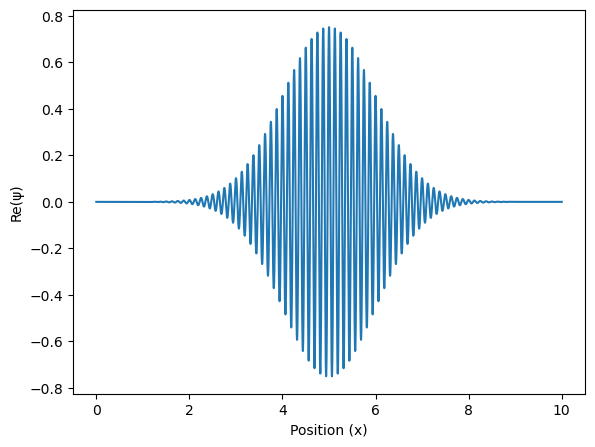

In [ ]:
# Initialize parameters for the wave packet
steps = 10000 # number of spatial steps
x = np.linspace(0, 10, steps) # spatial grid
h = x[1]-x[0] # spatial step size
n = len(x) # number of sample points

# Define the wave packet parameters
f = 8*2*np.pi # angular frequency
print('Omega =', f/(2*np.pi))

sigma = 1.0 # width of the packet

x0 = 5.0 # center of the packet

# Define the wave packet
packet = (1.0/np.sqrt(sigma*np.sqrt(np.pi)))*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*f*x)

# Plot the wave packet 
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x, packet.real) # plot the real part of the wavefunction (the imaginary part would be packet.imag)
ax.set_xlabel('Position (x)')
ax.set_ylabel('Re(ψ)')

plt.show()

Now lets try to perform a Fourier transform.

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


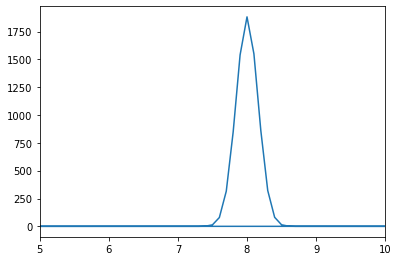

In [ ]:
# Compute the Fourier Transform of the wave packet
Fourier = fft(packet)
freq = fftfreq(n,h)

# Print the expected frequency and the peak found in the Fourier Transform
print('Omega = ', f/(2*np.pi))

# Find the peak in the Fourier Transform
m = abs(Fourier) >= max(abs(Fourier))
print('Fourier Transform Frequency Peak = ',np.round(freq[m],2))

# Plot the Fourier Transform
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(freq, abs(Fourier))
ax.set_xlim(5, 10)

plt.show()

Notice that we obtain a normal distribution around the frequency of the wavepacket. This means that the wavepacket is made up of a range of frequencies, all centered around the frequency of the wave itself. 

### 1.3.3 The Uncertainty Principle

You may be familiar with the Heisenburg Uncertainty Principle for a quantum objects position and momentum(or time and energy), which states that the more we know about a particles position in space, the less we know about its momentum and vice versa.

This is encapsulated in the formula

$$\Delta x \Delta p \geq \frac{\hbar}{2} $$

where the product of the uncertainty in position of a particle and the uncertainty in its momentum can never be less than one-half of the reduced Planck constant. 

This is a result of position and momentum, in the quantum sense, being related by a Fourier transform. That is, if we take the Fourier transform of some noise, the more definitive the distribution of that noise, the more broad the distributions of possible frequencies in the Fourier transform. 

### Exercise:

Take the above wave packet and change the value of $\sigma$, the width of the wave, and observe the resulting Fourier transform. For low values of $\sigma$, the resulting frequency distribution is broad. For high values of $\sigma$, the resulting frequency distribution sharpens at one frequency. 

You can try to define a function that takes $\sigma$ and $f$ as inputs and generates the corresponding wave packet and its Fourier transform and plots them.


```{admonition} Click to see the solution
:class: dropdown
```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Define the wave packet function
def wavepacket(sigma, f):
    """ 
    Function to create and plot a wave packet and its Fourier Transform.
    
    Parameters
    ----------
    sigma : float
        Width of the wave packet.
    f : float
        Frequency of the wave packet.
    Returns
    -------
    None
        This function plots the wave packet and its Fourier Transform.
 
    """
    steps = 10000
    x = np.linspace(0, 10, steps)
    h = x[1]-x[0]
    n = len(x)

    f = f*2*np.pi
    print('Omega = ', f/(2*np.pi))


    x0 = 5.0
    packet = (1.0/(sigma*np.sqrt(np.pi)))*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*f*x)

    fig1 = plt.figure()
    ax1 = fig1.add_axes([.1,.1,.8,.8])
    
    ax1.plot(x,packet.real)
    
    plt.show()
    
    Fourier = fft(packet)
    freq = fftfreq(n,h)

    print('Omega = ', f/(2*np.pi))
    m = abs(Fourier) >= max(abs(Fourier))
    print('Fourier Transform Frequency Peak = ',np.round(freq[m],2))

    fig2 = plt.figure()
    ax2 = fig2.add_axes([.1,.1,.8,.8])
    
    ax2.plot(freq, abs(Fourier))
    ax2.set_xlim(0, 20)
    
    plt.show()


In [98]:
def wavepacket(sigma, f):
    """ 
    Function to create and plot a wave packet and its Fourier Transform.
    
    Parameters
    ----------
    sigma : float
        Width of the wave packet.
    f : float
        Frequency of the wave packet.
    Returns
    -------
    None
        This function plots the wave packet and its Fourier Transform.
 
    """
    steps = 10000
    x = np.linspace(0, 10, steps)
    h = x[1]-x[0]
    n = len(x)

    f = f*2*np.pi
    print('Omega = ', f/(2*np.pi))


    x0 = 5.0
    packet = (1.0/(sigma*np.sqrt(np.pi)))*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*f*x)

    fig1 = plt.figure()
    ax1 = fig1.add_axes([.1,.1,.8,.8])
    
    ax1.plot(x,packet.real)
    
    plt.show()
    
    Fourier = fft(packet)
    freq = fftfreq(n,h)

    print('Omega = ', f/(2*np.pi))
    m = abs(Fourier) >= max(abs(Fourier))
    print('Fourier Transform Frequency Peak = ',np.round(freq[m],2))

    fig2 = plt.figure()
    ax2 = fig2.add_axes([.1,.1,.8,.8])
    
    ax2.plot(freq, abs(Fourier))
    ax2.set_xlim(0, 20)
    
    plt.show()

We have defined a function `wavepacket(sigma, f)` that creates and plots a wave packet with a given width `sigma` and frequency `f`. The function also computes and plots the Fourier Transform of the wave packet. Now, you can call this function with different values of `sigma` to observe how the width of the wave packet affects its Fourier Transform.

Omega =  8.0


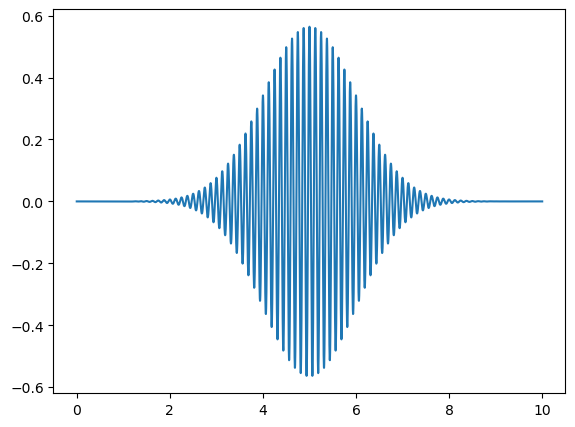

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


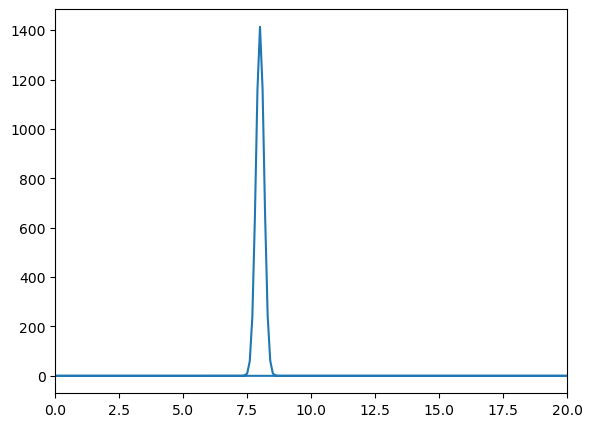

In [101]:
# Call the function with different sigma values
wavepacket(sigma=1.0,f=8)


Omega =  8.0


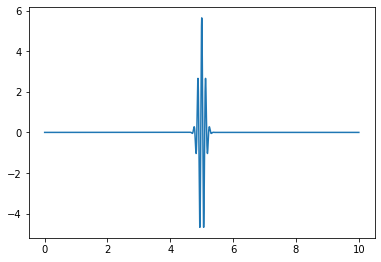

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


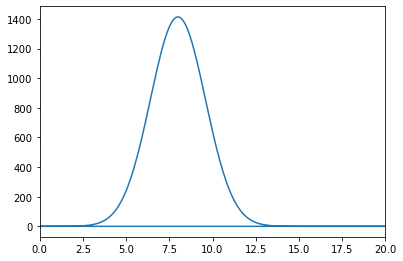

In [8]:
wavepacket(sigma=0.1,f=8)

Omega =  8.0


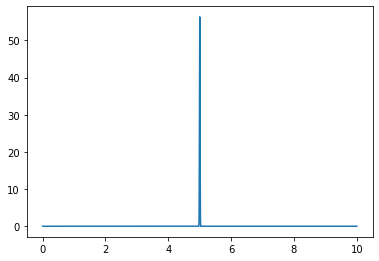

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


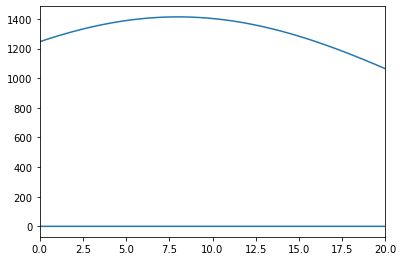

In [9]:
wavepacket(sigma=0.01,f=8)

With this function, we demonstrate the uncertainty principle, which states that the more confined a wave is in position space, the more spread out it is in frequency space, and vice versa. Since sigma represents the width of the wave packet in position space, changing its value will illustrate this principle.

For larger values of sigma, the wave packet becomes wider in position space, leading to a narrower distribution in frequency space. Conversely, smaller values of sigma result in a more confined wave packet in position space, which corresponds to a broader distribution in frequency space.

### 1.3.4 Quantum Fourier Transform

Quantum Fourier Transform is the quantum analogue of the discrete Fourier transform. It is used in many quantum algorithms, including Shor's algorithm for integer factorization and quantum phase estimation. It operates on the amplitudes of a quantum state, transforming them into a new set of amplitudes that represent the Fourier coefficients of the original state.

The Quantum Fourier Transform (QFT) can be implemented using a series of quantum gates, including Hadamard gates and controlled phase shift gates. The QFT is a crucial component of many quantum algorithms, as it allows for efficient manipulation of quantum states in the frequency domain.

More information on the Quantum Fourier Transform can be found in the [Qiskit Textbook](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html).

Recall that a quantum object can be represented by a superposition of basis states, where each basis state has a corresponding amplitude. Squaring the amplitude gives the probability of measuring the quantum object in that state. For a quantum object with $N$ basis states:

$$ |x> = x_0|0> + x_1|1> + x_2|2> + ... + x_{N-1}|N-1>$$

or more compactly

$$ |x> = \sum_{j=0}^{N-1}x_j|j> $$

For example, a single qubit with equal probability of being in basis states $|0>$ or $|1>$ is represented by

$$ |q> = \frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>$$

We can therefore fully represent this state in an array with elements $x_j$. We can change to another basis of states using a discrete fourier transform(with normalisation constant $1/\sqrt{N}$), changing the amplitudes $x_j$.

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j e^{-2\pi i k \frac{j}{N} }$$

Giving new amplitudes $y_k$ in a different basis.

$$ |y> = \sum_{k=0}^{N-1}y_k|k> $$

But this is just the same as using the Discrete Fourier Transform in the above sections.

Lets do an example, applying a Quantum Fourier Transform to the following qubit

$$ |x> = x_0|0> + x_1|1>$$

$$y_0 = \frac{1}{\sqrt{2}}(x_0e^{-2\pi i \frac{0\times 0}{2}} + x_1e^{-2\pi i \frac{0\times 1}{2}}) = \frac{1}{\sqrt{2}}(x_0 + x_1) $$

$$y_1 = \frac{1}{\sqrt{2}}(x_0e^{-2\pi i \frac{1\times 0}{2}} + x_1e^{-2\pi i \frac{1\times 1}{2}}) = \frac{1}{\sqrt{2}}(x_0 - x_1) $$

Lets impliment this in scipy.

In [ ]:
# First we define a qubit
n = 2 

x0 = 0 # amplitude of state |0>
x1 = 1 # amplitude of state |1>

# Create the state vector
x = np.array([x0,x1])

# Normalize the state vector
x = x/np.sqrt(np.dot(x.conj().T,x))

# Apply the Fourier Transform (which is a unitary operation)
# Note: we include the normalization factor 1/sqrt(n) to ensure unitarity
y = 1/np.sqrt(n)*fft(x)

# Print the results
print('|x> = ',x)
print('<x|x> = ',abs(x)**2,'\n')

print('|y> = ',y)
print('<y|y> = ',abs(y)**2)

|x> =  [0. 1.]
<x|x> =  [0. 1.] 

|y> =  [ 0.70710678+0.j -0.70710678-0.j]
<y|y> =  [0.5 0.5]


Representing $|x>$ as a vector, we can see that $|y>$ results from the multiplication of a Hadamard gate. 

So, Hadamard gates are closely related to the QFT.

$$ |x> = \begin{bmatrix}x_0 \\ x_1 \end{bmatrix} $$

$$ |y> = \begin{bmatrix}y_0 \\ y_1 \end{bmatrix} $$

$$ \begin{bmatrix}y_0 \\ y_1 \end{bmatrix} =\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix}x_0 \\ x_1 \end{bmatrix} = H\begin{bmatrix}x_0 \\ x_1 \end{bmatrix} $$

$$ |y> = H|x> $$

In [ ]:
x0 = 0
x1 = 1

x = np.array([x0,x1])

H = linalg.hadamard(2)

y = 1/np.sqrt(2)*H@x

print('|x> = ',x)
print('|y> = ',y)

|x> =  [0 1]
|y> =  [ 0.70710678 -0.70710678]


#### Multiple Qubits

We can perform a Quantum Fourier Transform on multiple qubits, where each row in the array $x$ and $y$ represents a different qubit. 

For two qubits:

In [110]:
n = 2

x = np.array([[0,1],[1/np.sqrt(2),1/np.sqrt(2)]])

y = 1/np.sqrt(n)*fft(x)

print('|x> = ',x,'\n')
print('<x|x> = ',abs(x)**2, '\n')

print('|y> = ',abs(y),'\n')
print('<y|y> = ',abs(y)**2,'\n')

|x> =  [[0.         1.        ]
 [0.70710678 0.70710678]] 

<x|x> =  [[0.  1. ]
 [0.5 0.5]] 

|y> =  [[0.70710678 0.70710678]
 [1.         0.        ]] 

<y|y> =  [[0.5 0.5]
 [1.  0. ]] 



### 1.3.5 The Bloch Sphere

We can represent the above transformations on the bloch sphere, using the parametrisation

$$|\psi> = cos(\frac{\theta}{2})|0> + e^{i\phi}sin(\frac{\theta}{2})|1> $$

So for $\phi=0$ and $\theta = \frac{\pi}{2}$

$$|\psi> = \frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1> $$

And for $\phi=0$ and $\theta = \pi$

$$|\psi> = 0|0> + 1|1> $$

In [ ]:
 def blochplot(phi,theta):
    """
    Function to plot a qubit state on the Bloch sphere.

    Parameters
    ----------
    phi : float
        The azimuthal angle (in radians) on the Bloch sphere.
    theta : float
        The polar angle (in radians) on the Bloch sphere.
    """
    # Defining the qubit state
    psi = [np.cos(theta/2.0),np.exp(1j*phi)*np.sin(theta/2.0)]
    
    # Printing it's probability amplitudes
    print('psi = {}|0> + {}|1>'.format(np.round(abs(psi[0]),2),np.round(abs(psi[1]),2)))
    print('psi prob = {} , {}'.format(np.round(abs(psi[0])**2,2),np.round(abs(psi[1])**2,2)))

    # Using spherical coordinates
    x=np.cos(phi)*np.sin(theta)
    y=np.sin(phi)*np.sin(theta)
    z=np.cos(theta)

    #Plotting a sphere of radius 1, with a black point at it's centre
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_axes([0,0,1,1],projection='3d')
    ax.grid(False)
    ax.set_axis_off()
    
    # Create a sphere
    u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
    xsphere = np.cos(u)*np.sin(v)
    ysphere = np.sin(u)*np.sin(v)
    zsphere = np.cos(v)
    
    # Wireframe allows to visualize the sphere as a grid on its surface; it can be applied to any 3D surface
    ax.plot_wireframe(xsphere, ysphere, zsphere, color="b",lw=0.3) # color is blue, lw is line width
    ax.scatter([0], [0], [0], color="black", s=50)
    
    # Draw a new axis
    ax.plot([-2,2],[0,0],[0,0],color='black',linestyle='--')
    ax.plot([0,0],[-2,2],[0,0],color='black',linestyle='--')
    ax.plot([0,0],[0,0],[-2,2],color='black',linestyle='--')

    # Plotting Text Labels
    ax.text(0, -0.0, 1.3, r"$|0\rangle$", color='black',size=15)
    ax.text(0, -0.0, -1.5, r"$|1\rangle$", color='black',size=15)
    
    
    #ax.text(0, -1.5, -0.2, "|+>", color='black',size=15)
    #ax.text(0, 1.4, 0.2, "|->", color='black',size=15)

    # Plotting a vector of the quantum state
    ax.plot([0,x],[0,y],[0,z], color='r')
    ax.scatter([x], [y], [z], color="red", s=50,marker= 'o')
    
    plt.show()

Suppose we are in the state $|0>$ with absolute certainty, then $\phi=0$ and $\theta=0$


$$|\psi> = 1|0> + 0|1> $$

This is represented on the bloch sphere as

psi = 1.0|0> + 0.0|1>
psi prob = 1.0 , 0.0


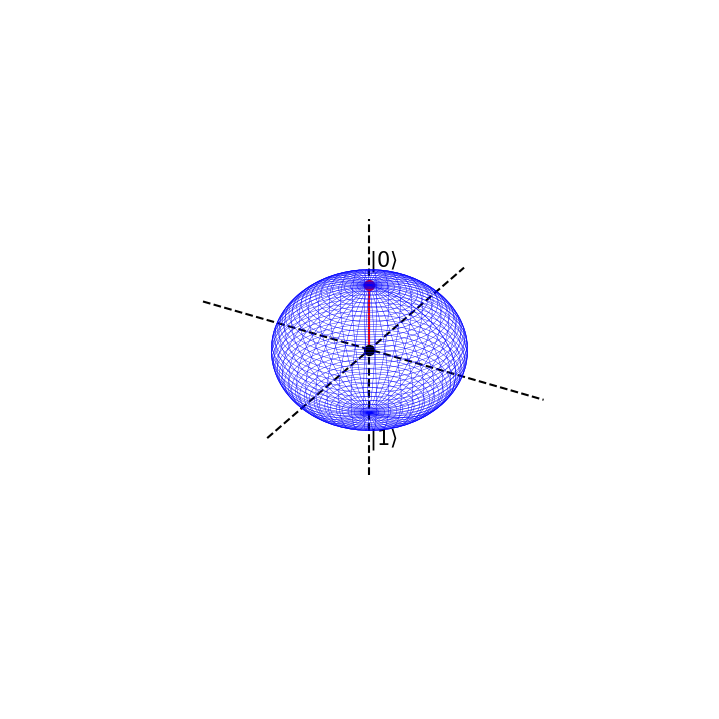

In [116]:
# Now we define the angles phi and theta
phi=0
theta = 0*np.pi

# and call the function
blochplot(phi,theta)

If we apply a QFT or Hadamard gate on $\psi$, the result will be the following state

$$\psi_H = H\psi = \frac{1}{\sqrt{2}}(x_0 + x_1)|0> + \frac{1}{\sqrt{2}}(x_0 - x_1)|1> = \frac{1}{\sqrt{2}}(|0>+|1>) $$

which has corresponding values $\phi=0$ and $\theta =\frac{\pi}{2} $.

psi = 0.71|0> + 0.71|1>
psi prob = 0.5 , 0.5


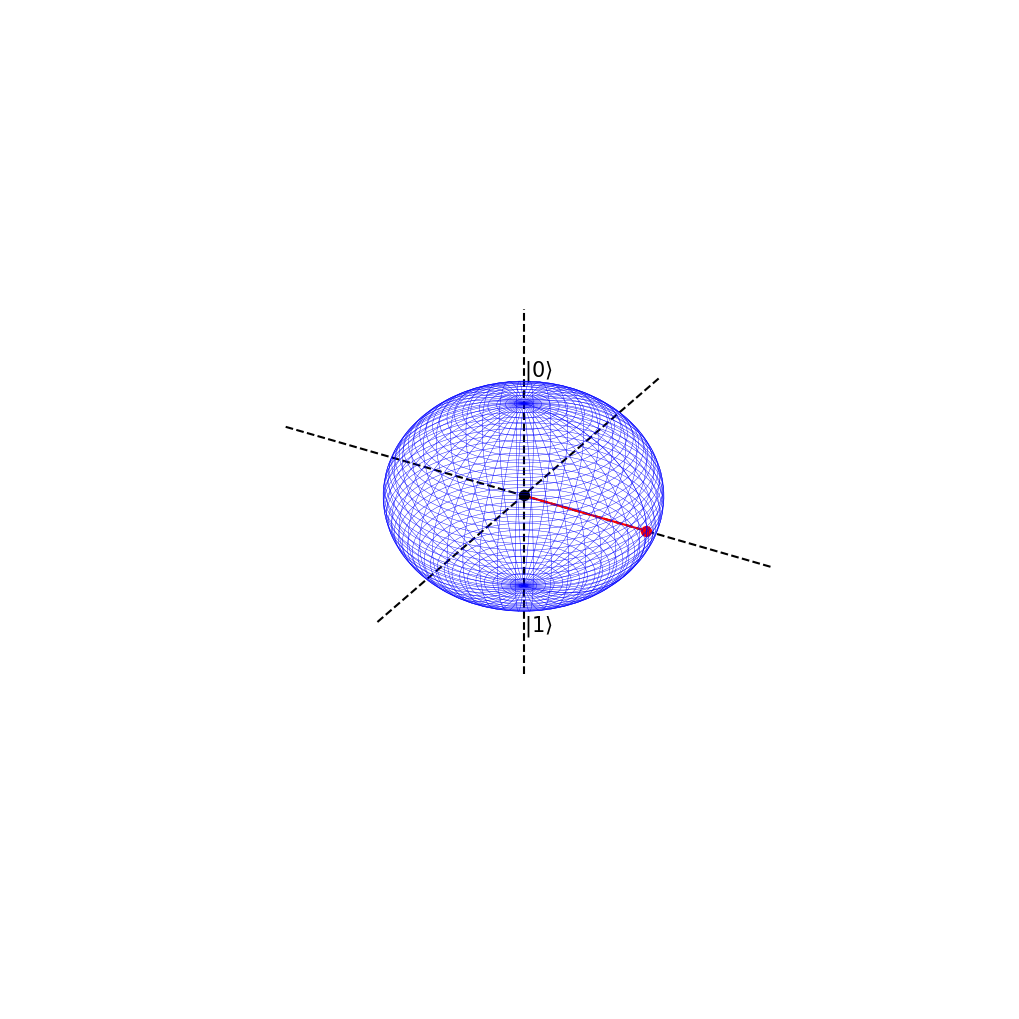

In [114]:
# We can try different angles
phi=0
theta = np.pi/2.0

blochplot(phi,theta)

This can be seen as an entirely new basis state. We shall label it as

$$ |+> =  \frac{1}{\sqrt{2}}(|0>+|1>) $$

$$ |-> =  \frac{1}{\sqrt{2}}(|0>-|1>) $$

Notice that when we have maximal certainty about our initial state $|\psi> = 1|0>+0|0>$, we have minimal uncertainty about the state we quantum fourier transform into

$$ |+> =  \frac{1}{\sqrt{2}}(|0>+|1>) $$

The prior is definitely in the state $|0>$ but the latter has equal chance of being in state $|0>$ or $|1>$. However, in the latter, we know with absolute certainty that it is in state $|+>$, but

$$ |\psi>= |0> =  \frac{1}{\sqrt{2}}(|+>+|->) $$

so we have maximal uncertainty as to whether the initial $|\psi>$ is in state $|+>$ or $|->$.

This is the uncertainty principle at work for qubit states. There is a trade off in knowledge about particular basis states, when we transform between them. 

So applying a Hadamard gate, or QFT,  to our qubit rotates our qubit by $\frac{\pi}{2}$ around the bloch sphere.

## 1.4 Scipy ODEs & PDEs

Arriving to the last section of this chapter, we will briefly discuss how Scipy can be used to solve ordinary differential equations (ODEs) and partial differential equations (PDEs).

Compared to NumPy, which does not have built-in support for solving differential equations, Scipy provides a more comprehensive set of tools for this purpose. Its efficiency and ease of use make it a preferred choice for solving ODEs and PDEs in Python.

Then, we will use Scipy's `integrate` module, which provides functions for solving ordinary differential equations (ODEs) and partial differential equations (PDEs).


In [117]:
import matplotlib.pyplot as plt
from matplotlib import animation  # we will use the animation functions
from IPython.display import HTML  # we will use this to display the animation in a jupyter notebook


import numpy as np
import numpy.random as rnd  # we will use numpy for arrays and matrices

import scipy
from scipy import integrate  # we will use scipy for integration

### 1.4.1 Integration

The function `scipy.integrate.quad(f,a,b)` integrates a function `f(x)` between the bounds [`a`,`b`] using a technique from the Fortran library QUADPACK and returns the value `y` of the definite integral integral and the error in this calculation,

$$y = \int_a^b f(x)\ dx.$$

In [118]:
def f(x):
    """
    Example function to integrate.
    Parameters
    ----------
    x : float
        Input variable.
    Returns
    -------
    float
        The computed value of the function at the given input.
    """
    return 2*x

For example for the above function $f(x) = 2x$ with the limits [$2$,$5$] we get,

$$y = \int_2^5 \left(2x\right)\ dx =  x^2 \bigg|_{x=2}^{x=5} = 5^2 - 2^2 = 21.$$

The integral, of course, gives the area under the curve.

Area = 21.0
Error = 2.3314683517128287e-13


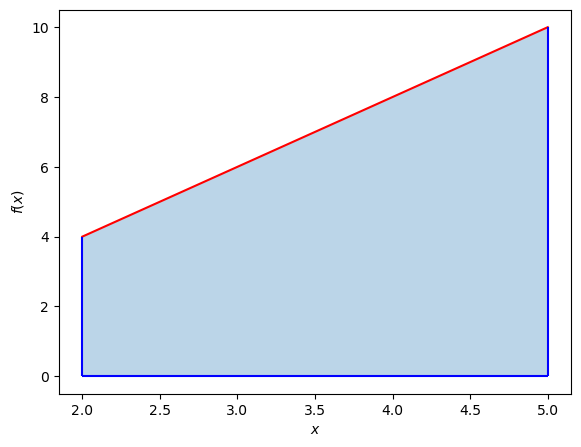

In [119]:
# define the limits of integration
a = 2
b = 5

# call the integration function
def_int, err = integrate.quad(f,a,b)

# print the results
print('Area =',def_int)
print('Error =',err)

# generate x values for plotting
x = np.linspace(a,b,100)

# initialize the figure
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,f(x),'r')

ax.vlines([a,b],[0,0],[f(a),f(b)],'b')
ax.hlines(0,a,b,'b')
ax.fill_between(x,f(x),alpha=0.3)

ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

plt.show()

The function `scipy.integrate.dblquad(g,a,b,c,d)` integrates a function `g(x,y)` between the bounds [`a`,`b`] in `x` and [`c`,`d`] in `y` using a technique from the Fortran library QUADPACK and returns the value `z` of the definite integral integral and the error in this calculation,

$$z = \int_c^d \int_a^b g(x,y)\ dx dy.$$

In [120]:
def g(x,y):
    """
    Example function to integrate.
    Parameters
    ----------
    x : float
        Input variable x.
    y : float
        Input variable y.
    Returns
    -------
    float
        The computed value of the function at the given inputs.
    """
    return np.sqrt(x**2 + y**2 +16)

Area = 327.8820544699914
Error = 4.38526073264293e-09


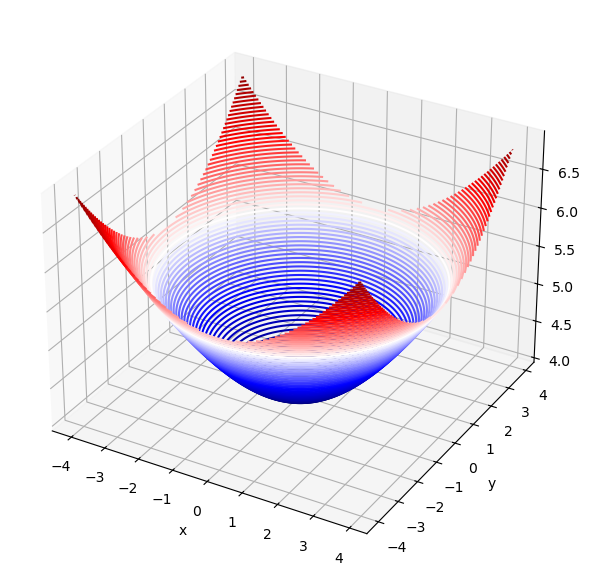

In [121]:
# define the limits of integration
a = -4
b = 4
c = -4
d = 4

# call the double integration function
def_int, err = integrate.dblquad(g,a,b,c,d)

# print the results
print('Area =',def_int)
print('Error =',err)

# generate x and y values for plotting
x = np.arange(a,b,0.1)
y = np.arange(c,d,0.1)

# create a meshgrid for 3D plotting
Xmesh,Ymesh = np.meshgrid(x, y)
Zmesh = g(Xmesh,Ymesh)

# Create a 3D contour plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([.1,.1,.8,.8],projection='3d')

ax.contour3D(Xmesh,Ymesh,Zmesh,90,cmap='seismic')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

The function `scipy.integrate.tplquad(h,a,b,c,d,e,f)` integrates a function `h(x,y,z)` between the bounds [`a`,`b`] in `x`, [`c`,`d`] in `y`, and [`e`,`f`] in `z` using a technique from the Fortran library QUADPACK and returns the value `k` of the definite integral and the error in this calculation,

$$k=\int_e^f \int_c^d \int_a^b h(x,y,z)\ dx dy dz.$$

In [125]:
def h(x,y,z):
    """
    Example function to integrate.
    
    Parameters
    ----------
    x : float
        Input variable x.
    y : float
        Input variable y.
    z : float
        Input variable z.
    Returns
    -------
    float
        The computed value of the function at the given inputs.
    """
    return np.sqrt(x**2 + y**2 +z**2 +16)

In [127]:
# define the limits of integration
lower_bound = -4
upper_bound = 4

# call the triple integration function
def_int, err = integrate.tplquad(h,
                                 lower_bound, # limits for x
                                 upper_bound, # limits for x
                                 lambda x: lower_bound,  # limits for y
                                 lambda x: upper_bound,  # limits for y
                                 lambda x,y: lower_bound,  # limits for z
                                 lambda x,y: upper_bound)  # limits for z

# print the results
print('Area =',def_int)
print('Error =',err)

Area = 2872.0630239126044
Error = 8.054480129954428e-09


### 1.4.2 Ordinary Differential Equations (ODEs)

A first order ODE is an equation of the form

$$\frac{dy}{dt} = f(t,y) $$

Lets do an example of radioactive decay, and how we can use scipy to solve an ODE. 

The half life of carbon-14 is 5700 years. It's corresponding decay constant is given by the formula:

$$ k = \frac{ln(\frac{1}{2})}{5700} = -0.0001216 $$

We can write an ordinary differential equation that encapsulates radioactive, exponential decay as follows

$$ \frac{dy}{dt} = k*y $$

Lets solve this, for an initial 100g sample of carbon-14, using `scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45',t_eval=None)`. 

This solves an ODE, given an initial value `y0`, over a time span `t_span`, where the right hand side of the above equation is given by `fun`. 

The method of integration is set to fourth-order Runge-Kutta by default. `t_eval` can be set to an array that specifies the times at which to store the solution, otherwise this is set by default. 

The function returns multiple attributes, most importantly `.t` and `.y` which give the stored times and $y$-values for the solution.

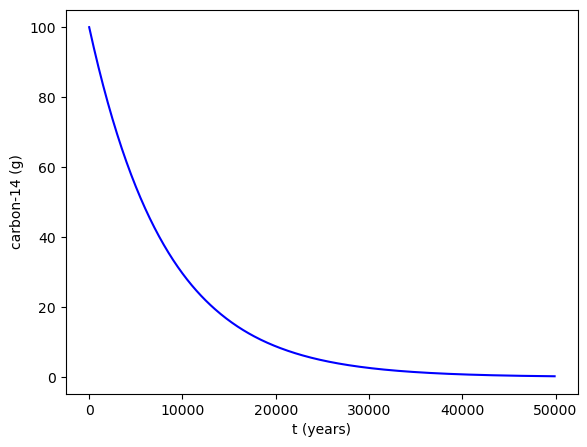

In [ ]:
# First we define the decay constant 
k = -0.0001216

# Then we define the differential equation
def exponential_decay(t, y): 
    """
    Differential equation for exponential decay.
    Parameters
    ----------
    k : float
        Decay constant.
    y : float
        Amount of substance at time t.
    t : float
        Time variable.
    Returns
    -------
    float
        The rate of change of the substance at time t.
    """
    return k * y

# We define the time points where we want the solution
t = np.arange(0,50000,100)
sol = integrate.solve_ivp(exponential_decay, [0, 50000], [100], t_eval=t)

# Plotting the solution
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(sol.t,sol.y[0,:],'b')
ax.set_xlabel('t (years)')
ax.set_ylabel('carbon-14 (g)')

plt.show()

We can also solve for multiple initial values of `y`, in other words that `y0` can be an array. Here we have solution for 100g, 50g, and 10g of carbon-14.

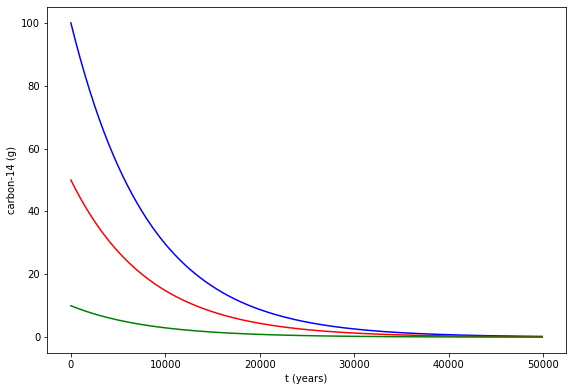

In [ ]:
# First we define the decay constant
k = -0.0001216

# Then we define the system of differential equations
def exponential_decay(t, y): return k * y # same function as before but in compact form

# We define the time points where we want the solution
t = np.arange(0,50000,100)
sol = integrate.solve_ivp(exponential_decay, [0, 50000], [100,50,10], t_eval=t)

# Plotting the solution
fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(sol.t,sol.y[0,:],'b',label = '$100$g')
ax.plot(sol.t,sol.y[1,:],'r',label = '$50$g')
ax.plot(sol.t,sol.y[2,:],'g',label = '$10$g')

ax.set_xlabel('t (years)')
ax.set_ylabel('carbon-14 (g)')

plt.show()

### 1.4.3 Finite-Difference Method

#### Taylor's Theorem


Taylor's theorem states that any smooth function $f(x)$ can be approximated as an infinite sum of terms calculated from the values of its derivatives at a single point. This is known as the Taylor series expansion of the function about the point $x_0$. The Taylor series allows us to approximate derivatives, particularly in a discrete step-wise manner. We will leverage this to our advantage, greatly simplifying integral and derivative problems.

$$f(x_0 + h) = f(x_0) + \frac{f'(x_0)}{1!}h + \frac{f''(x_0)}{2!}h^2  + ... + \frac{f^{(n)}(x_0)}{n!}h^n + R_n(x) $$

Lets start by truncating the series at $n=1$, assuming that the remainder $R_1(x)$ can be neglected.

$$f(x_0 + h) \approx f(x_0) + \frac{f'(x_0)}{1!}h $$

$$\implies f'(x_0) \approx \frac{f(x_0 + h)-f(x_0)}{h} $$

Thus we have an approximation for the first derivative over a discrete step $h$.

### The Laplace Operator

Lets do the something similar for the second derivative

$$f(x_0 + h) \approx f(x_0) + \frac{f'(x_0)}{1!}h + \frac{f''(x_0)}{2!}h^2 $$
$$f(x_0 - h) \approx f(x_0) - \frac{f'(x_0)}{1!}h + \frac{f''(x_0)}{2!}h^2 $$

Adding these two equations gives 

$$f''(x_0) \approx \frac{f(x_0 - h) -2f(x_0) + f(x_0 + h)}{h^2} $$

This is known as the Central-Difference Approximation.

Suppose we have six discrete values of a function $f$ inside some array/vector

$$f(x) = \begin{bmatrix}f_0 \\ f_1 \\ f_2 \\ f_3 \\ f_4 \\ f_5 \end{bmatrix} $$

We can transform this vector, multiplying by some matrix, that finds the second derivative at each discrete point $f_i$ using the above approximation.

$$\begin{bmatrix}f^{''}_0 \\ f^{''}_1 \\ f^{''}_2 \\ f^{''}_3 \\ f^{''}_4 \\ f^{''}_5 \end{bmatrix} = \frac{1}{h^2}\begin{bmatrix}-2 & 1 & 0 & 0 & 0 &0\\ 1 & -2 & 1 & 0 & 0 &0\\ 0 &1 & -2 & 1 & 0 &0 \\ 0& 0 &1 & -2 & 1 &0 \\ 0 & 0& 0 &1 & -2&1\\0 & 0 & 0& 0 &1 & -2 \end{bmatrix}\begin{bmatrix}f_0 \\ f_1 \\ f_2 \\ f_3 \\ f_4 \\ f_5 \end{bmatrix}$$

Where $h$ is the spacing between discrete inputs to $f$.

We will call this matrix/operator the Laplace Operator and label it as $\textbf{L}$, so that for $n$ discrete values of a function

$$\frac{\partial{}^2}{\partial{x^2}} =  \textbf{L} = \frac{1}{h^2}
\begin{bmatrix}
-2 & 1 & 0 & 0 & & \cdots & & 0 \\ 
1 & -2 & 1 & 0 & & \cdots \\ 
0 & 1 & -2 & & & & & \vdots \\
0 & 0 & & \ddots & \ddots \\
& & & \ddots & \ddots & & 0 & 0 \\
\vdots & \vdots & & & & -2 & 1 & 0 \\ 
& & & & 0 & 1 & -2 & 1 \\ 
0 & & \cdots & & 0 & 0 & 1 & -2 \\
\end{bmatrix}
$$

Notice, that we can classify this as a sparse matrix, and leverage this using scipy.

Lets test this on $\frac{x^3}{6}$, where $\frac{d^2}{dx^2}\frac{x^3}{6}=x$

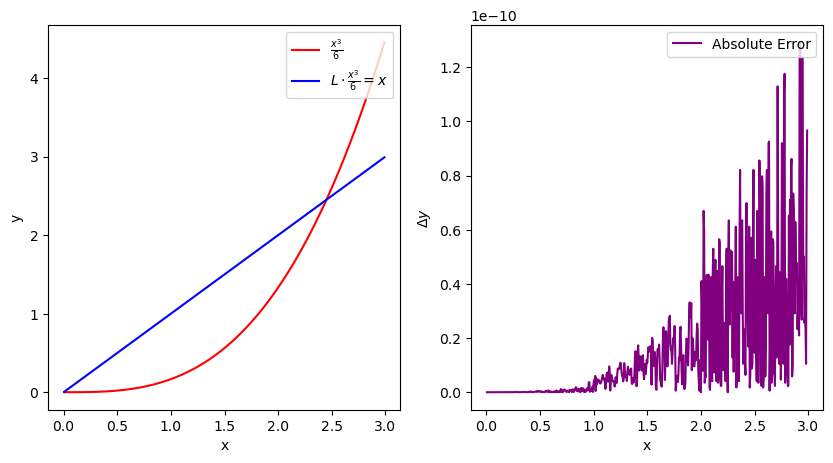

In [ ]:
# First we define the spatial step size and the spatial grid
h = 0.005
x = np.arange(0, 3, h)
size = x.size

# scipy.sparse.diags creates a sparse matrix from diagonals
# Here we create a second derivative operator using finite differences
L = scipy.sparse.diags([1, -2, 1],[-1, 0, 1],shape=(size,size))/h**2

Error = abs(x[1:-1]-L.dot((x**3)/6)[1:-1])

# Plotting the results
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(x[1:-1], ((x**3)/6)[1:-1], label=r"$\frac{x^3}{6}$",color="red")
ax1.plot(x[1:-1], L.dot(((x**3)/6))[1:-1], label=r"$L \cdot \frac{x^3}{6} = x$",color="blue")
ax1.legend(loc=1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax2.plot(x[1:-1],Error,label="Absolute Error",color="purple")
ax2.legend(loc=1)
ax2.set_xlabel('x')
ax2.set_ylabel(r"$\Delta y$")

plt.show()

In [137]:
# You can convert the sparse matrix to a dense format for easier visualization
print('Print sparse matrix: \n', L)

Print sparse matrix: 
   (np.int32(1), np.int32(0))	40000.0
  (np.int32(2), np.int32(1))	40000.0
  (np.int32(3), np.int32(2))	40000.0
  (np.int32(4), np.int32(3))	40000.0
  (np.int32(5), np.int32(4))	40000.0
  (np.int32(6), np.int32(5))	40000.0
  (np.int32(7), np.int32(6))	40000.0
  (np.int32(8), np.int32(7))	40000.0
  (np.int32(9), np.int32(8))	40000.0
  (np.int32(10), np.int32(9))	40000.0
  (np.int32(11), np.int32(10))	40000.0
  (np.int32(12), np.int32(11))	40000.0
  (np.int32(13), np.int32(12))	40000.0
  (np.int32(14), np.int32(13))	40000.0
  (np.int32(15), np.int32(14))	40000.0
  (np.int32(16), np.int32(15))	40000.0
  (np.int32(17), np.int32(16))	40000.0
  (np.int32(18), np.int32(17))	40000.0
  (np.int32(19), np.int32(18))	40000.0
  (np.int32(20), np.int32(19))	40000.0
  (np.int32(21), np.int32(20))	40000.0
  (np.int32(22), np.int32(21))	40000.0
  (np.int32(23), np.int32(22))	40000.0
  (np.int32(24), np.int32(23))	40000.0
  (np.int32(25), np.int32(24))	40000.0
  :	:
  (np.int32(574

In [141]:
L_dense = L.todense()
print('\nPrint dense matrix: \n', L_dense)


Print dense matrix: 
 [[-80000.  40000.      0. ...      0.      0.      0.]
 [ 40000. -80000.  40000. ...      0.      0.      0.]
 [     0.  40000. -80000. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ... -80000.  40000.      0.]
 [     0.      0.      0. ...  40000. -80000.  40000.]
 [     0.      0.      0. ...      0.  40000. -80000.]]


### 1.4.4 Partial Differential Equations (PDEs)

### The Schrödinger Equation

Lets use the above function to solve a PDE, namely the time-independent Schrödinger equation in one-dimension:

$$\frac{-\hbar^2}{2m}\frac{\partial{}^2}{\partial{x^2}}\psi(t,x) + V(x)\psi(t,x) = i\hbar \frac{\partial{}}{\partial{t}}\psi(t,x) $$

We can rewrite this equation in the following way

$$i\hbar\frac{\partial{}}{\partial{t}}\psi(t,i) = \left[\frac{-\hbar^2}{2m}\textbf{L} + V(i)\right]\psi(t,i) $$

Where $x\rightarrow i$ is interpreted as discretising the problem. We have thus reduced the problem to an ODE, as seen above. 

Let's investigate, and solve the problem, with various potentials $V(x)$.

#### The Quantum Harmonic Oscillator

$$V(x) = \frac{1}{2}m\omega^2(x-a)^2 $$

$$\omega = \frac{2\pi}{T} $$

Where $\omega$ is the angular frequency of the oscillator, and $T$ is it's period, $m$ is the mass. $a$ is the centre of oscialltion. 

For ease, $m=\hbar=T=1 \implies \omega = 2\pi$ and

$$V(x) = 2\pi^2(x-a)^2$$

In [29]:
# Initialise the discrete spatial points, x, into an array
h = 0.005
x = np.arange(-10, 10, h)
size = x.size

# Define the Laplace Operator
L = scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(size, size)) / h**2

# Initialise the parameter values and potential V
hbar = 1 
m = 1
w = 2*np.pi
a = 0    
V = 0.5*m*(w**2)*(x-a)**2

# Define the function to be integrated
def wave_fun(t, psi):
    return -1j*(-(hbar/(2*m))*L.dot(psi) + (V/hbar)*psi)

# Time range for integration     
t_eval = np.arange(0.0, 1.0, h) 

We will define our initial state $\psi(t=0)$ as that of a wave packet scene in the previous section 6.4

$$\psi(x) = \frac{1}{(\pi \sigma^2)^{\frac{1}{4}}}e^{-\frac{(x-x_0)^2}{2\sigma^2}}e^{ifx} $$

Where $\sigma$ is the width, $x_0$ is it's position, and $f$ is it's frequency.

In [30]:
# Define the initial state psi
f = 8*(2*np.pi)
sigma = 1.0 
x0 = a
packet = (1.0/np.sqrt(sigma*np.sqrt(np.pi)))*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*f*x)

# Normalise
packet = packet/(np.sqrt(sum((abs(packet))**2)))  

We will now solve using 
```scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45',t_eval=None)```

This might take a while to run, as we are solving for many time steps.

In [32]:
sol = scipy.integrate.solve_ivp(wave_fun, t_span = [0, 1], y0 = packet, t_eval = t_eval)

Now lets plot

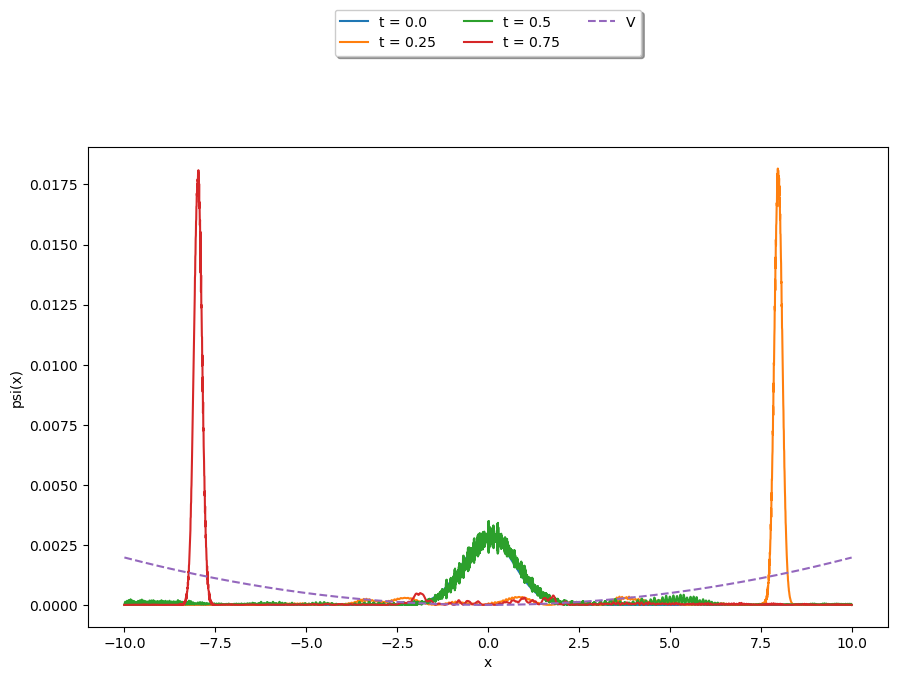

In [33]:
# Plot the result at different times
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([.1,.1,.8,.8])

for i, t in enumerate(sol.t):
    if i%50==0:
        ax.plot(x, np.abs(sol.y[:,i])**2,label='t = {}'.format(t)) 

# Plot the potential, adjusting size for visual aid
ax.plot(x, V*0.000001, "--", label='V')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, fancybox=True, shadow=True)

ax.set_xlabel('x')
ax.set_ylabel('psi(x)')
plt.show()

In [45]:
#%matplotlib inline # Use this line if you are in a Jupyter notebook environment

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax1 = fig.add_axes([.1,.1,.8,.8])

ax1.set_xlim(-10, 10)
ax1.set_ylim(-0.1, 0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('psi(x)')

title = ax1.set_title('The Quantum Harmonic Oscillator')

line1, = ax1.plot([], [], "--")
line2, = ax1.plot([], [],color='red')


def init():
    """ 
    Initialize the background of the animation.
    """
    line1.set_data(x, V*0.000001)
    return line1,


def animate(i):
    """
    Perform animation step.
    """
    line2.set_data(x, sol.y[:,i])
    title.set_text('t = {0:1.3f}'.format(sol.t[i]))
    return line1,

anim = FuncAnimation(fig, animate, init_func=init, frames=len(sol.t), interval=50, blit=True)

plt.show()

<IPython.core.display.Javascript object>

/Users/silviags/opt/miniconda3/envs/PyQM/lib/python3.10/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


#### Fourier Transform

Then we can apply a Fourier transform to see the frequency components of the wavefunction at different times.

In [46]:
from numpy.fft import fftfreq
from scipy import fftpack


F = fftpack.fft(sol.y[:,0])
w = fftfreq(size, h)
F = F/(np.sqrt(sum((abs(F))**2)))

indices = w > 0 # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 10)

<IPython.core.display.Javascript object>

(0.0, 10.0)

In [ ]:
F = np.zeros(shape=(size,sol.y.size),dtype='complex')
w = fftfreq(size, h)

for i, t in enumerate(sol.t):
    F[:,i] = fftpack.fft(sol.y[:,i])
    F[:,i] = F[:,i]/(np.sqrt(sum((abs(F[:,i])**2))))
    sol.y[:,i] = sol.y[:,i]/(np.sqrt(sum((abs(sol.y[:,i])**2))))

print(np.sqrt(sum((abs(F[:,i])**2))))
print(np.sqrt(sum((abs(sol.y[:,i])**2))))

1.0000000000000013
0.999999999999998


(0.12615662610102787+9.912719241054443e-12j)


<IPython.core.display.Javascript object>


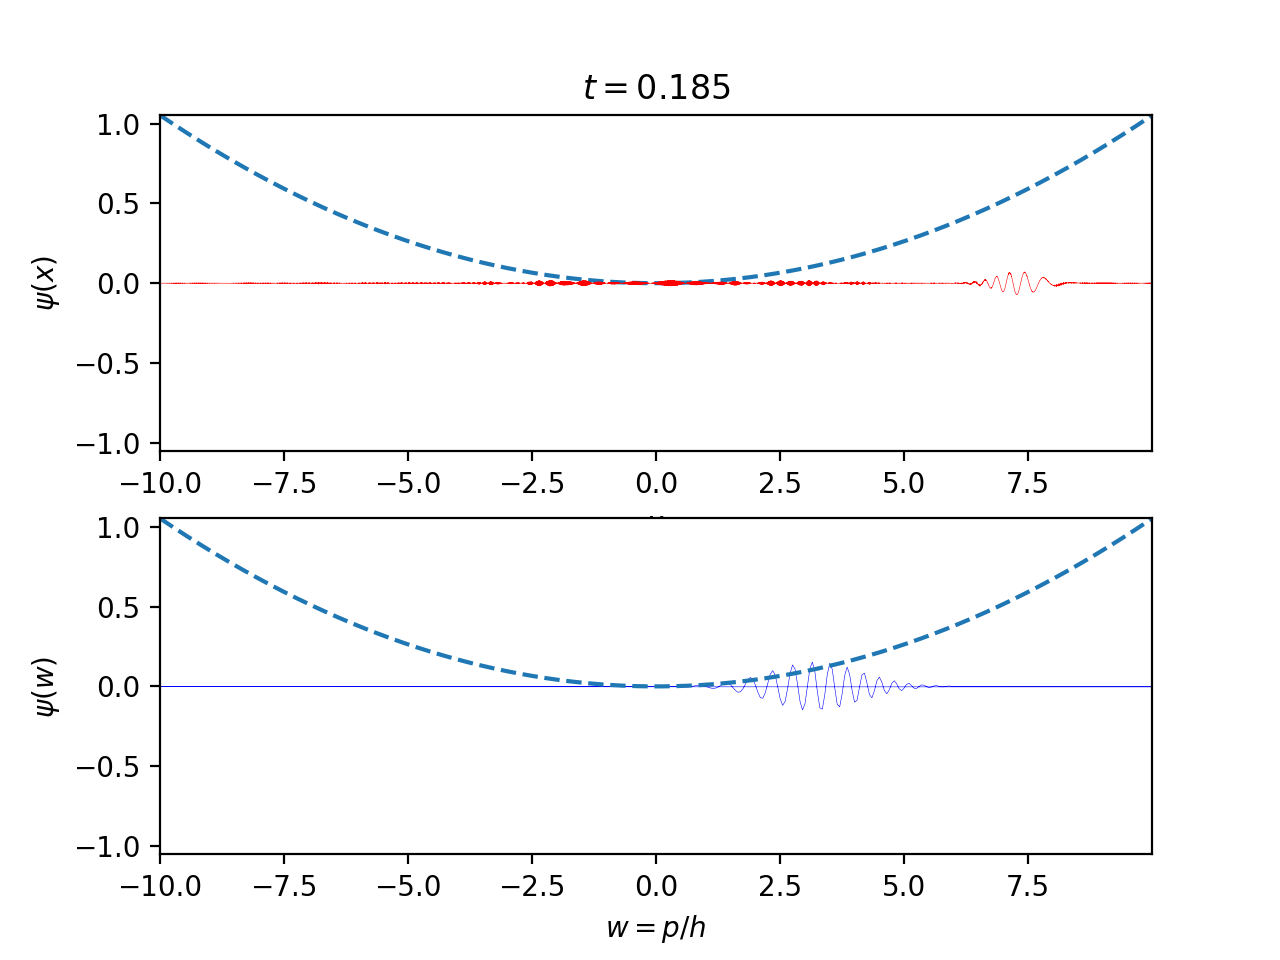

In [ ]:
print(max(sol.y[:,0])/max(F[:,0]).real)

fig, (ax1,ax2) = plt.subplots(2,1)

limit = 2.5*max(F[:,0])
scaler = 1/(max(V)/limit)

ax1.set_xlim(x[0], x[-1])
ax1.set_ylim(-limit,limit)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\psi(x)$')

ax2.set_xlim(x[0], x[-1])
ax2.set_ylim(-limit, limit)
ax2.set_xlabel('$w=p/h$')
ax2.set_ylabel('$\psi(w)$')

title = ax1.set_title('The Quantum Harmonic Oscillator')

line1, = ax1.plot([], [], ls="--")
line2, = ax1.plot([], [],color='red', lw=.2)
line3, = ax2.plot([], [],color='blue', lw=.2)
line4, = ax2.plot([], [], ls="--")

def init():
    line1.set_data(x, V*scaler)
    line4.set_data(x, V*scaler)
    return line1,line4


def animate(i):
    line2.set_data(x, sol.y[:,i])
    line3.set_data(w, F[:,i])
    title.set_text('$t = {0:1.3f}$'.format(sol.t[i]))
    return line2,line3

anim = FuncAnimation(fig, animate, init_func=init, frames=len(sol.t), interval=50, blit=True)    
plt.show()

#### Step Potential & Quantum Tunnelling

In [49]:
h = 0.005
x = np.arange(0, 10, h)
size = x.size

LO = scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(size, size)) / h**2

hbar = 1 
m=1

x_Vmin = 5         # center of V(x)
T      = 1  

omega = 2 * np.pi / T
k = omega**2 * m
V = np.zeros(size)
V[int(V.size/2):] = x_Vmin*250

def psi_t(t, psi):
    return -1j * (- 0.5 * hbar / m * LO.dot(psi) + V / hbar * psi)

dt = 0.001  # time interval for snapshots
t0 = 0.0    # initial time
tf = 0.2   # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

sigma=0.5
x0 = 3.0
kx = 50
A = 1.0 / (sigma * np.sqrt(np.pi))
psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)



# Solve the Initial Value Problem
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval)

<IPython.core.display.Javascript object>


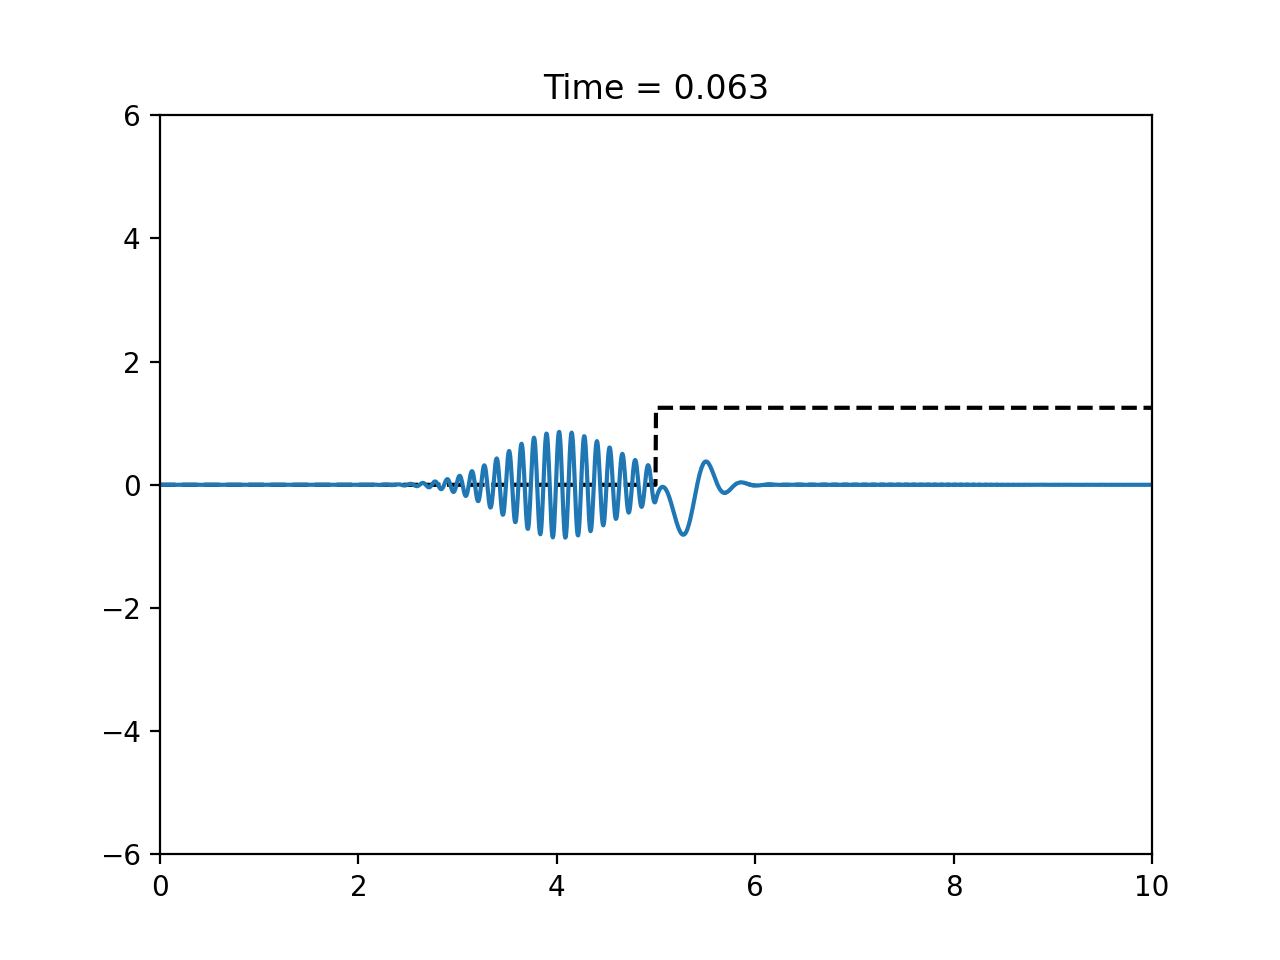

In [ ]:
%matplotlib notebook

fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(-6, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])


def init():
    line1.set_data(x, V * 0.001)
    return line1,


def animate(i):
    line2.set_data(x, (sol.y[:,i]).real)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


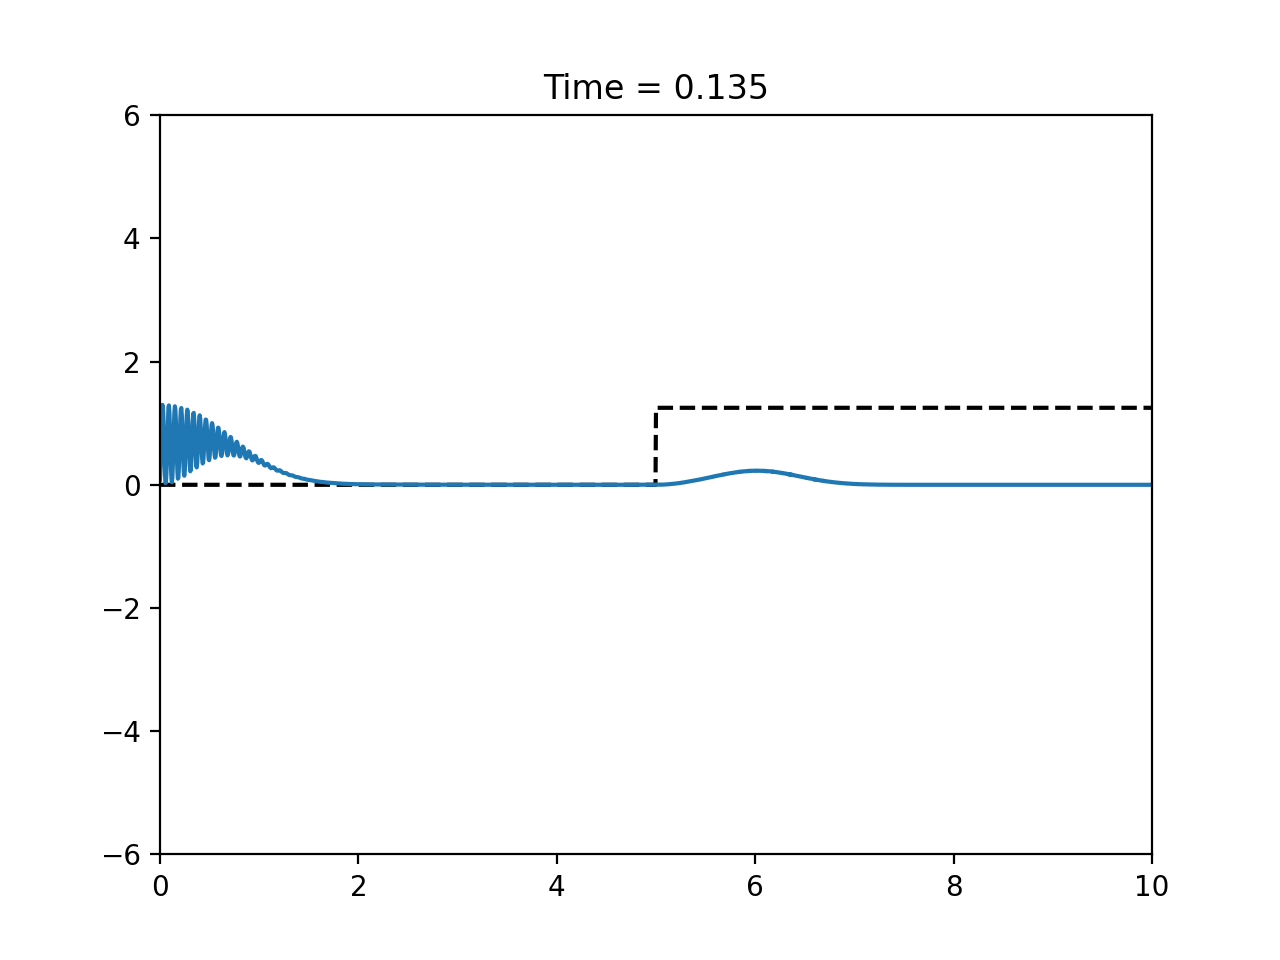

In [ ]:
%matplotlib notebook

fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(-6, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])


def init():
    line1.set_data(x, V * 0.001)
    return line1,


def animate(i):
    line2.set_data(x, (np.abs(sol.y[:,i]))**2)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


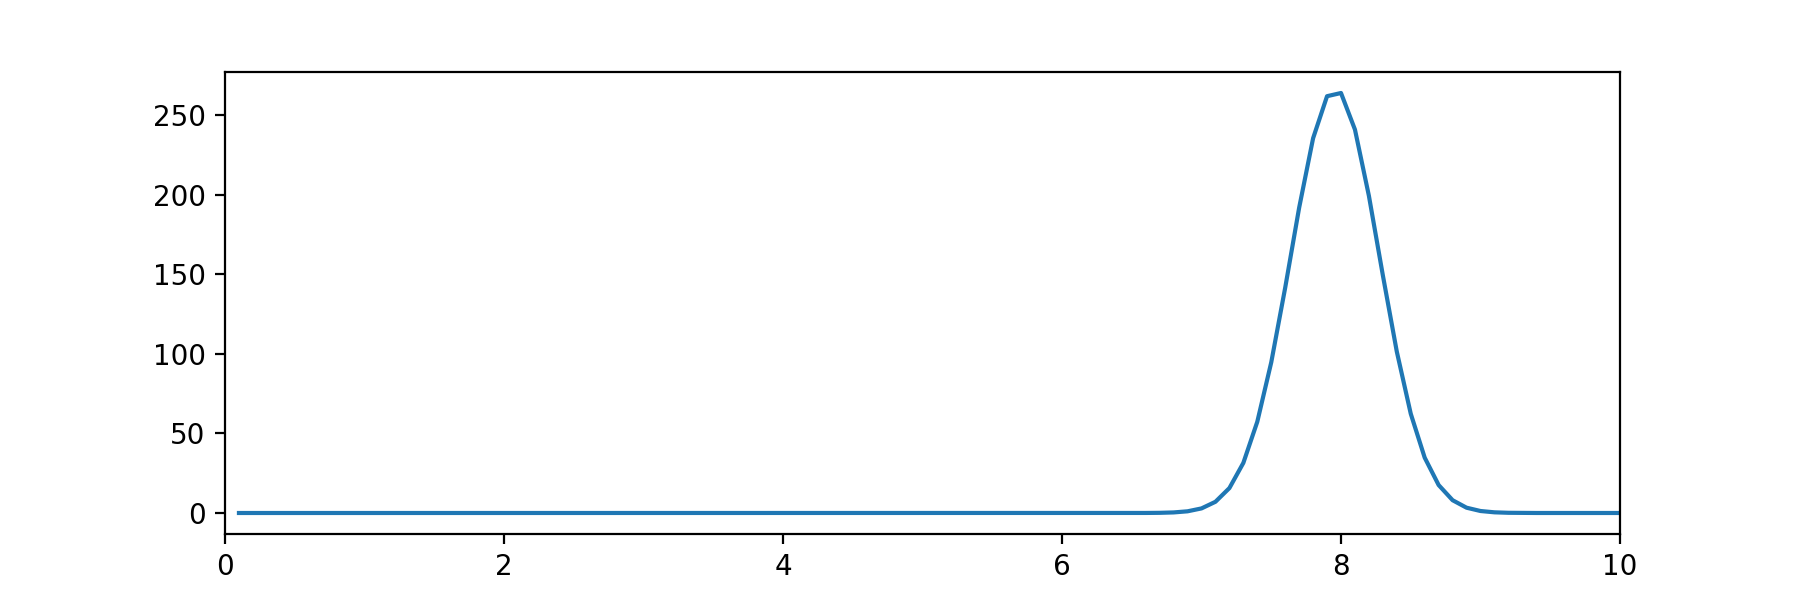

In [52]:
F = fftpack.fft(sol.y[:,0])
w = fftfreq(size, h)

indices = w > 0 # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 10)

plt.show()